<a href="https://colab.research.google.com/github/akash1331123/Akash-Car-sales/blob/main/Car_Sales_Akash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Problem Statement</u></b>

### A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

### They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

* ### Which variables are significant in predicting the price of a car
* ### How well those variables describe the price of a car
* ### Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# <b><u> Business Goal</u></b>
### We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# <b> <u>Project Overview</u></b>
###The project aims to conduct a comprehensive analysis of the automotive market using a dataset containing information about various car models. The analysis will focus on exploring correlations between different features, identifying market trends, and evaluating predictive modeling techniques to provide valuable insights for stakeholders in the automotive industry.**

# <b> <u>Project Timeline:</u></b>

###Phase 1: Data Exploration and Preprocessing (1 week)

###Phase 2: Analysis and Visualization (2 weeks)

###Phase 3: Predictive Modeling and Evaluation (2 week)

###Phase 4: Report Compilation and Presentation (1 week)

# <b> <u>Project Success Criteria:</u></b>

### 1.  Successful identification of market trends and correlations between different features
### 2.   Demonstration of predictive modeling techniques with satisfactory performance metrics
### 3. Clear and actionable recommendations provided to stakeholders for informed decision-making.



# **Import Packages**

**First Import the necessary library package**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
#from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# **Mount the google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing the csv file of Dairy Dataset**

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Pythen file/Car_sales (1).csv')

# **Exploratory Data Analysis**

In [4]:
df.head()

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch
0,Acura,Integra,16.919,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012
1,Acura,TL,39.384,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011
2,Acura,CL,14.114,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012
3,Acura,RL,8.588,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011
4,Audi,A4,20.397,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011


**All Columns**

In [5]:
# Total Columns in Dataset
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch'],
      dtype='object')

**reindex of all columns**

In [6]:
df = df.reindex(columns=['Manufacturer', 'Model','Sales_in_thousands', 'Vehicle_type','Engine_size','Horsepower',
                         'Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Latest_Launch',
                         'Price_in_thousands'])

In [7]:
# Check shape of Dataset
df.shape

(157, 14)

**Total number of columns is 14 and number of rows in 157**

# **Datatypes**

In [8]:
# To Check all Column DataType
df.dtypes

,0
Manufacturer,object
Model,object
Sales_in_thousands,float64
Vehicle_type,object
Engine_size,float64
Horsepower,float64
Wheelbase,float64
Width,float64
Length,float64
Curb_weight,float64


**we can see only four column named date is object type and ten columns are float type and is no integer column present in the dataset**

# **Missing Data, and Summary Statistics**

In [9]:
# To Check overall Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Engine_size         156 non-null    float64
 5   Horsepower          156 non-null    float64
 6   Wheelbase           156 non-null    float64
 7   Width               156 non-null    float64
 8   Length              156 non-null    float64
 9   Curb_weight         155 non-null    float64
 10  Fuel_capacity       156 non-null    float64
 11  Fuel_efficiency     154 non-null    float64
 12  Latest_Launch       157 non-null    object 
 13  Price_in_thousands  155 non-null    float64
dtypes: float64(10), object(4)
memory usage: 17.3+ KB


# <b>DataSet Information:</b>


Manufacturer : Name of car company (Categorical)

Model: company different car model (Categorical)

Sales in thousands: overall sales in thousand (Numeric)

Vehicle type: Type of vehical like passenger and car (Categorical)

Engine size: Size of engine  (Numeric)

horsepower: Horsepower (Numeric)

wheelbase: Weelbase of car (Numeric)

carwidth: Width of car (Numeric)

carlength: Length of car (Numeric)

curb weight: The weight of a car without occupants or baggage. (Numeric)

Fule capacity: The capacity of fual contain. (Numeric)

Fule efficiency: The efficiency of fule. (Numeric)

Latest Launch: Launch date of car model (Categorical)

price in thousand (Dependent variable): Price of the car model (Numeric)

# **Total number of duplicate rows**

In [10]:
# Total number of duplicate rows persent in this data.
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:",duplicate_rows.shape)

Number of duplicate rows: (0, 14)


**So there are no duplicate rows in the data set**

# **Data Preparation**

**Checking Null Values**

In [11]:
df.isnull().sum()

,0
Manufacturer,0
Model,0
Sales_in_thousands,0
Vehicle_type,0
Engine_size,1
Horsepower,1
Wheelbase,1
Width,1
Length,1
Curb_weight,2


**we can see that there are missing data Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiencys**

# **We are simply replacing the null values ​​with company mean values ​​because this dataset contains cars of different ranges that why we are replace null value from mean .**

**Price in thousand column null value**

In [12]:
price_in_thousand=df[df['Price_in_thousands'].isna()]
price_in_thousand

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Price_in_thousands
2,Acura,CL,14.114,Passenger,3.2,225.0,106.9,70.6,192.0,3.47,17.2,26.0,1/4/2012,NaN
33,Chrysler,Town & Country,53.480,Car,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7/13/2011,NaN


**This is the all car models from Acura**

In [13]:
Acura_Price = df.loc[df['Manufacturer'] == 'Acura']
Acura_Price

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Price_in_thousands
0,Acura,Integra,16.919,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,21.5
1,Acura,TL,39.384,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,28.4
2,Acura,CL,14.114,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,42.0


In [14]:
AcuraPrice = df.loc[df['Manufacturer'] == 'Acura', 'Price_in_thousands'].mean()
print('This is the mean value of Acura all car price',AcuraPrice)

This is the mean value of Acura all car price 30.633333333333336


In [15]:
# fill the value of price_in thousand column
df['Price_in_thousands'] = df['Price_in_thousands'].fillna(30.63)

**In Manufacturer is Chrysler and Model is Town & Country are maximum columns is null that why we delete this row**

In [16]:
# Drop row
df = df.drop(33)

In [17]:
Curb_weight=df[df['Curb_weight'].isna()]
Fuel_efficiency=df[df['Fuel_efficiency'].isna()]

In [18]:
# null value of curb weight columns
Curb_weight

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Price_in_thousands
15,Cadillac,Seville,15.943,Passenger,4.6,275.0,112.2,75.0,201.0,NaN,18.5,22.0,4/29/2011,44.475


**This is the all car models from Cadillac**

In [19]:
Cadillac_Curb_weight = df.loc[df['Manufacturer'] == 'Cadillac']
Cadillac_Curb_weight

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Price_in_thousands
14,Cadillac,DeVille,63.729,Passenger,4.6,275.0,115.3,74.5,207.2,3.978,18.5,22.0,2/23/2012,39.895
15,Cadillac,Seville,15.943,Passenger,4.6,275.0,112.2,75.0,201.0,NaN,18.5,22.0,4/29/2011,44.475
16,Cadillac,Eldorado,6.536,Passenger,4.6,275.0,108.0,75.5,200.6,3.843,19.0,22.0,11/27/2011,39.665
17,Cadillac,Catera,11.185,Passenger,3.0,200.0,107.4,70.3,194.8,3.770,18.0,22.0,9/28/2011,31.010
18,Cadillac,Escalade,14.785,Car,5.7,255.0,117.5,77.0,201.2,5.572,30.0,15.0,4/17/2012,46.225


In [20]:
Cadillac_Seville_Curb_weight = df.loc[df['Manufacturer'] == 'Cadillac', 'Curb_weight'].mean()
print('This is the mean value of Cadillac all Curb weight',Cadillac_Seville_Curb_weight)

This is the mean value of Cadillac all Curb weight 4.29075


In [21]:
# Fill the null value
df['Curb_weight']=df['Curb_weight'].fillna(4.290750)

In [22]:
Fuel_efficiency

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Price_in_thousands
38,Dodge,Intrepid,88.028,Passenger,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN,6/2/2012,22.505
109,Oldsmobile,Intrigue,38.554,Passenger,3.5,215.0,109.0,73.6,195.9,3.455,18.0,NaN,4/1/2011,24.150


**This is the all car models from Dodge**

In [23]:
Dodge_Fuel_efficiency = df.loc[df['Manufacturer'] == 'Dodge']
Dodge_Fuel_efficiency

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Price_in_thousands
35,Dodge,Neon,76.034,Passenger,2.0,132.0,105.0,74.4,174.4,2.567,12.5,29.0,12/12/2011,12.640
36,Dodge,Avenger,4.734,Passenger,2.5,163.0,103.7,69.1,190.2,2.879,15.9,24.0,7/1/2012,19.045
37,Dodge,Stratus,71.186,Passenger,2.5,168.0,108.0,71.0,186.0,3.058,16.0,24.0,10/31/2011,20.230
38,Dodge,Intrepid,88.028,Passenger,2.7,202.0,113.0,74.7,203.7,3.489,17.0,NaN,6/2/2012,22.505
39,Dodge,Viper,0.916,Passenger,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,8/7/2011,69.725
40,Dodge,Ram Pickup,227.061,Car,5.2,230.0,138.7,79.3,224.2,4.470,26.0,17.0,3/6/2012,19.460
41,Dodge,Ram Wagon,16.767,Car,3.9,175.0,109.6,78.8,192.6,4.245,32.0,15.0,1/6/2012,21.315
42,Dodge,Ram Van,31.038,Car,3.9,175.0,127.2,78.8,208.5,4.298,32.0,16.0,7/26/2012,18.575
43,Dodge,Dakota,111.313,Car,2.5,120.0,131.0,71.5,215.0,3.557,22.0,19.0,11/25/2011,16.980
44,Dodge,Durango,101.323,Car,5.2,230.0,115.7,71.7,193.5,4.394,25.0,17.0,6/27/2012,26.310


In [24]:
Dodge_Fuel_efficiency=df.loc[df['Manufacturer']=='Dodge','Fuel_efficiency'].mean()
print('This is the mean value of Dodge all Fuel efficiency',Dodge_Fuel_efficiency)

This is the mean value of Dodge all Fuel efficiency 20.1


In [25]:
df.loc[38, "Fuel_efficiency"] = 20.1

**This is the all car models from Oldsmobile**

In [26]:
Oldsmobile_Fuel_efficiency=df.loc[df['Manufacturer']=='Oldsmobile']
Oldsmobile_Fuel_efficiency

,Manufacturer,Model,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Price_in_thousands
108,Oldsmobile,Cutlass,1.112,Passenger,3.1,150.0,107.0,69.4,192.0,3.102,15.2,25.0,5/31/2011,18.145
109,Oldsmobile,Intrigue,38.554,Passenger,3.5,215.0,109.0,73.6,195.9,3.455,18.0,NaN,4/1/2011,24.150
110,Oldsmobile,Alero,80.255,Passenger,2.4,150.0,107.0,70.1,186.7,2.958,15.0,27.0,10/20/2009,18.270
111,Oldsmobile,Aurora,14.690,Passenger,4.0,250.0,113.8,74.4,205.4,3.967,18.5,22.0,2/18/2011,36.229
112,Oldsmobile,Bravada,20.017,Car,4.3,190.0,107.0,67.8,181.2,4.068,17.5,19.0,9/21/2011,31.598
113,Oldsmobile,Silhouette,24.361,Car,3.4,185.0,120.0,72.2,201.4,3.948,25.0,22.0,6/25/2011,25.345


In [27]:
Oldsmobile_Fuelefficiency=df.loc[df['Manufacturer']=='Oldsmobile','Fuel_efficiency'].mean()
print('This is the mean value of Oldsmobile all model Fuel efficiency',Oldsmobile_Fuelefficiency)

This is the mean value of Oldsmobile all model Fuel efficiency 23.0


In [28]:
df.loc[109, "Fuel_efficiency"] = 23.0

**Check Null value**

In [29]:
df.isnull().sum().count()

np.int64(14)

**There are no null values in the data**

# **Dropping unnecessary columns**

**We are not doing time series analysis so we are removing the Sales and Latest_Launch columns.**

In [30]:
df= df.drop(['Sales_in_thousands'], axis=1)
df= df.drop(['Latest_Launch'], axis=1)

In [31]:
### removing multicollear
df['car_area'] = df['Length']*df['Width']

# **Feature Analysis**

<Axes: xlabel='Price_in_thousands', ylabel='Density'>

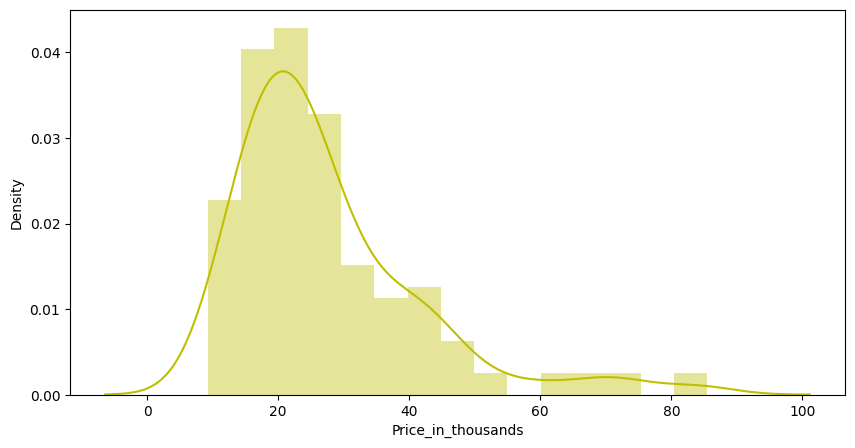

In [32]:
# Dependent variable 'Price'
plt.figure(figsize=(10,5))
sns.distplot(df['Price_in_thousands'],color="y")

**The Dependent column is a positive skewed**

<Axes: xlabel='Price_in_thousands', ylabel='Density'>

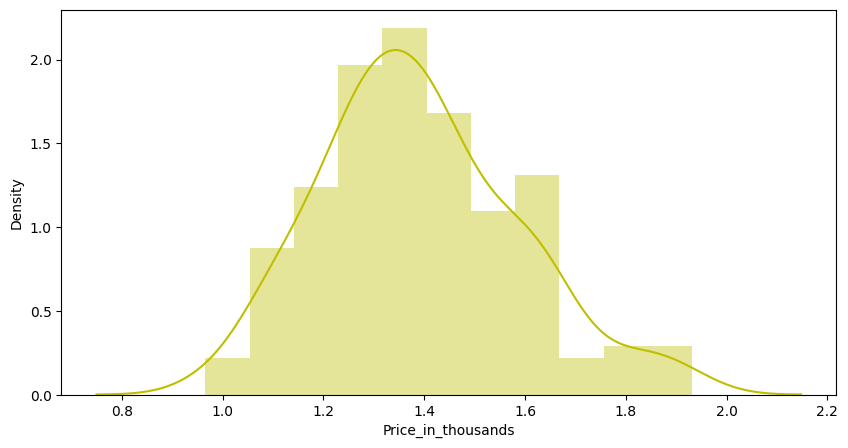

In [33]:
# Dependent variable 'Price'
plt.figure(figsize=(10,5))
sns.distplot(np.log10(df['Price_in_thousands']),color="y")

**So we perform log transtormation our dependent column look like normali distributed**

# **Que 1 = What is the distribution of numerical features in the dataset, and how do the mean and median values compare within each feature**

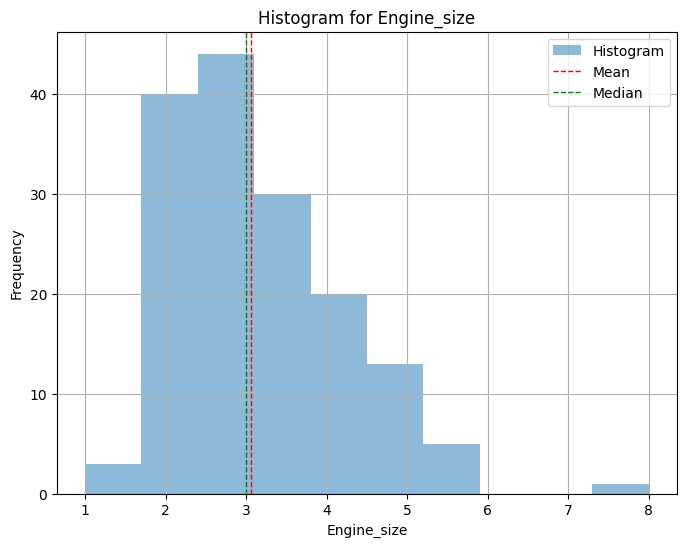

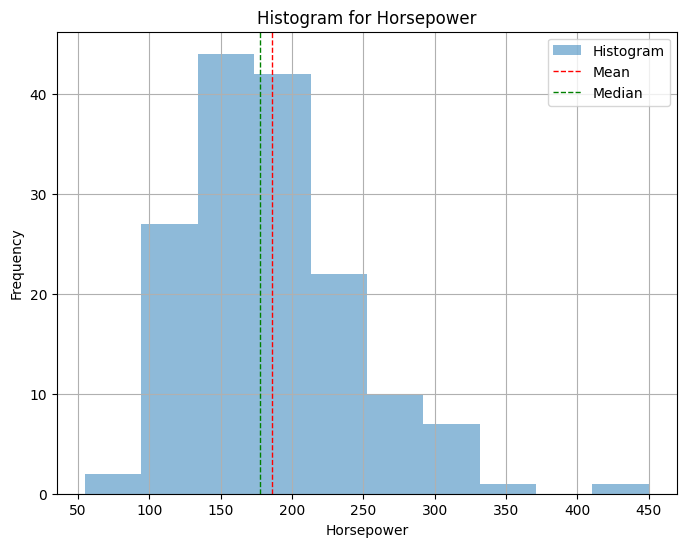

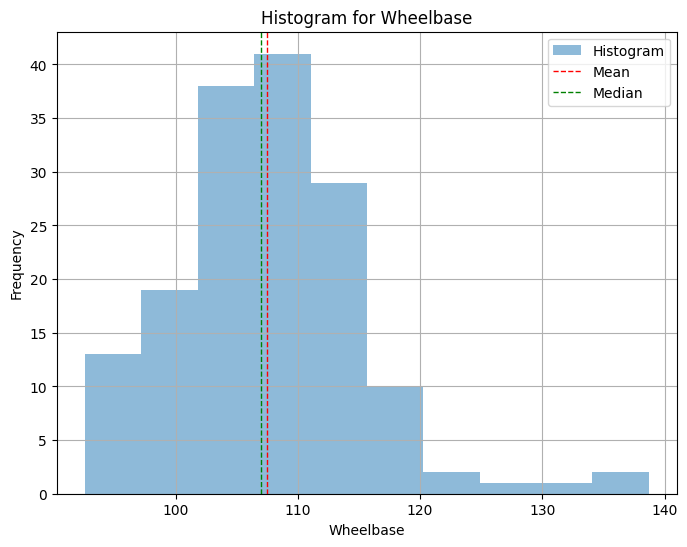

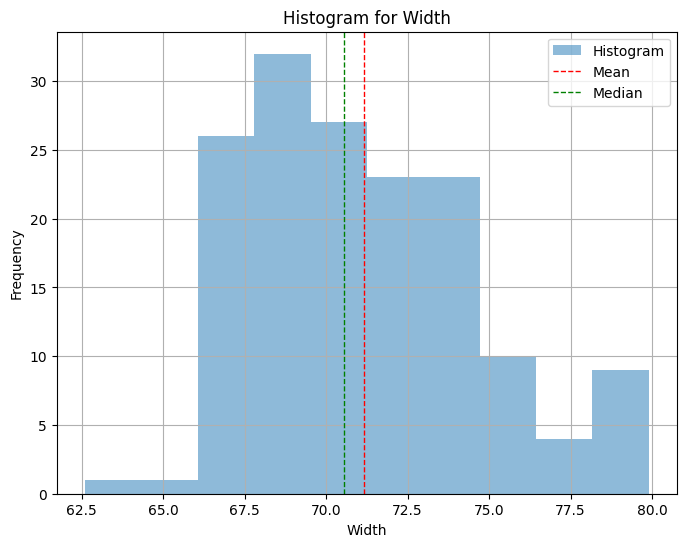

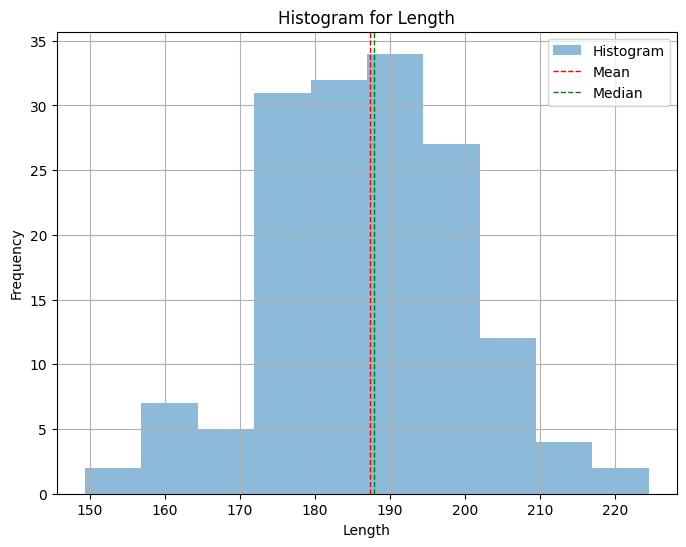

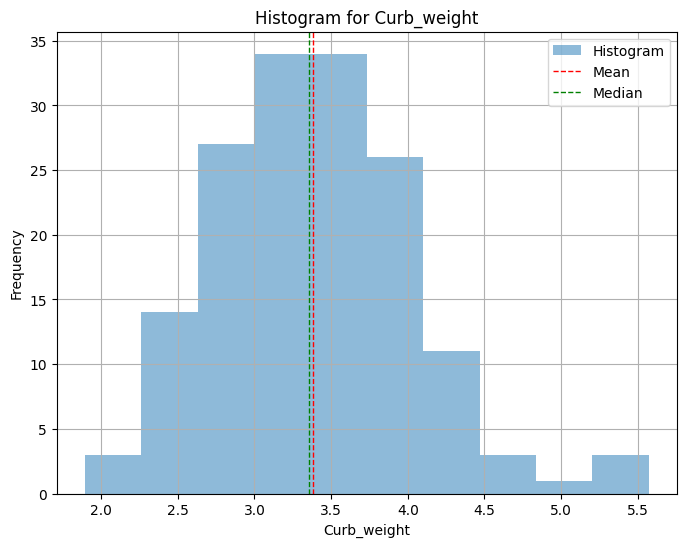

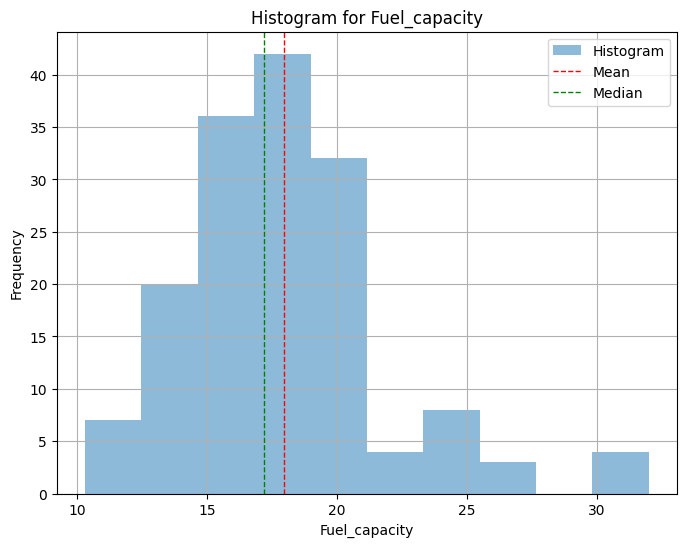

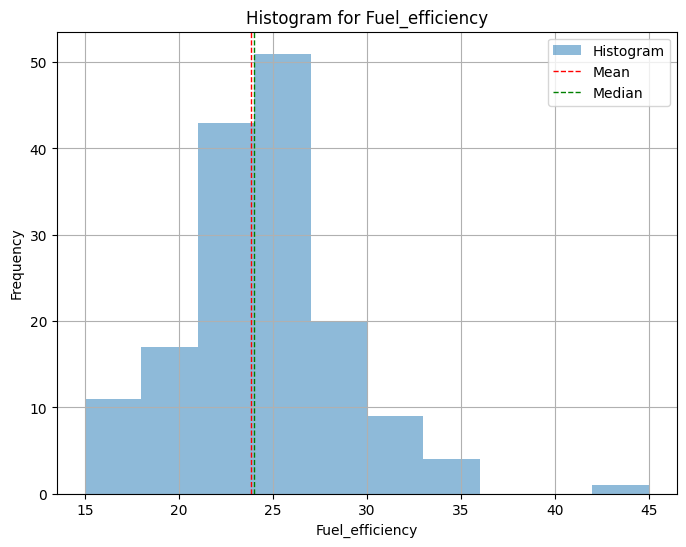

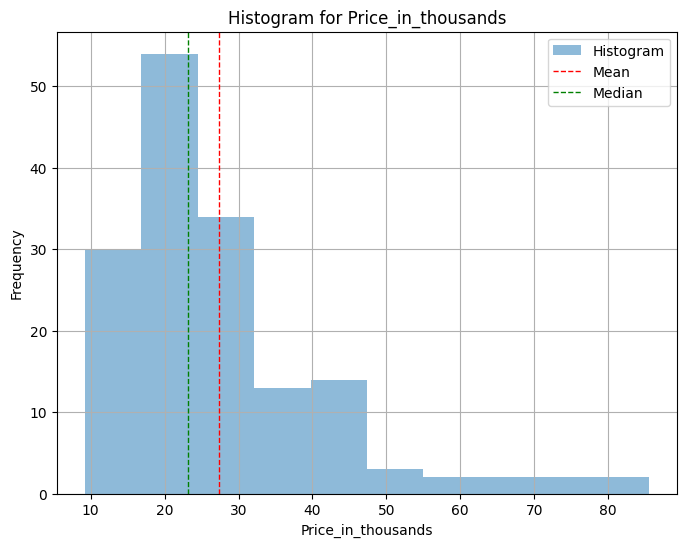

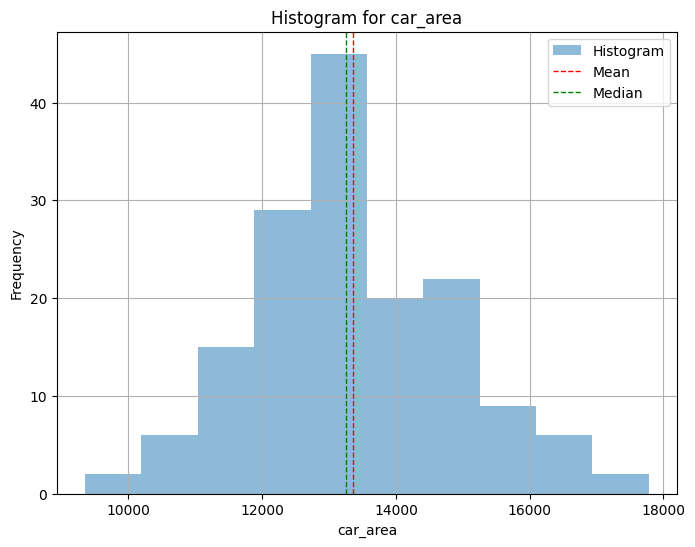

In [34]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculate mean and median for each numerical column
summary_stats = {}
for col in numerical_columns:
    summary_stats[col] = {
        'mean': df[col].mean(),
        'median': df[col].median()
    }

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=10, alpha=0.5, label='Histogram')
    plt.axvline(x=summary_stats[col]['mean'], color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.axvline(x=summary_stats[col]['median'], color='green', linestyle='dashed', linewidth=1, label='Median')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

**We noticed that every column in our dataset is positively and negatively skewed because our dataset contains cars from different price ranges.**

# **Que 2 = What is the relationship between each numerical feature and the 'Price_in_thousands' of cars in the dataset? How strong is the correlation between these features and the price, and what insights can be drawn from the linear regression lines**

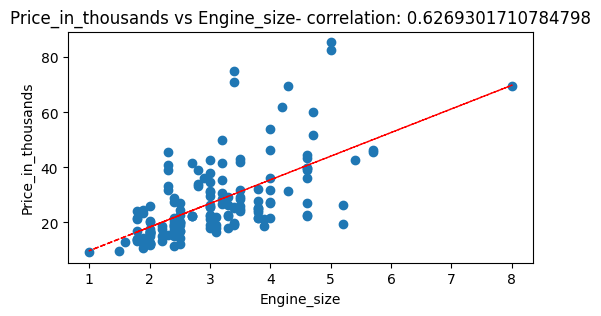

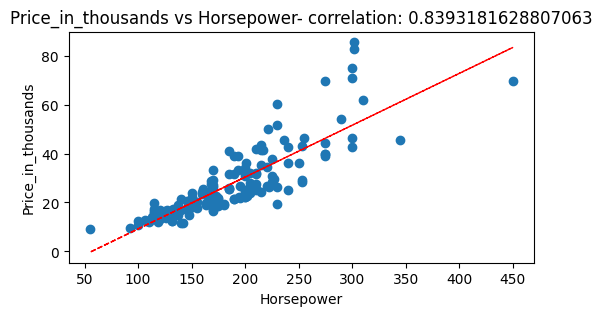

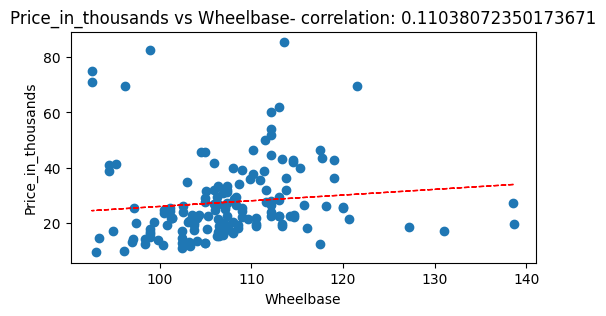

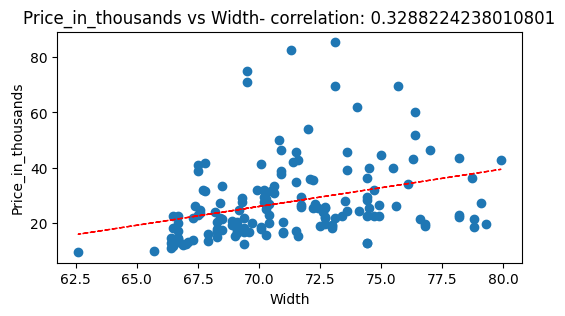

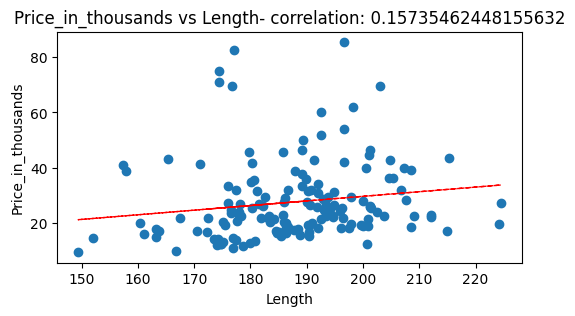

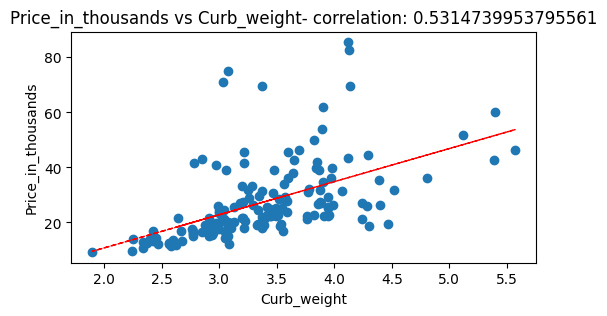

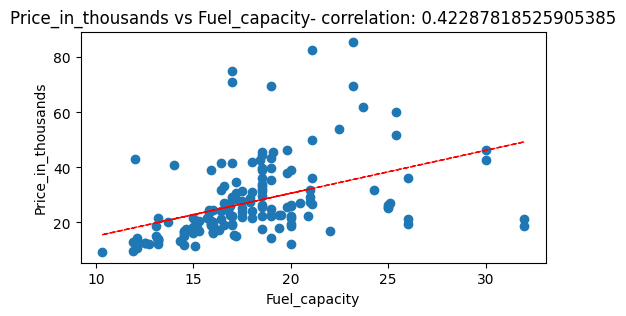

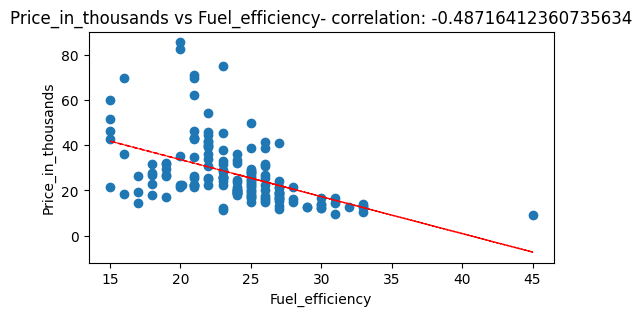

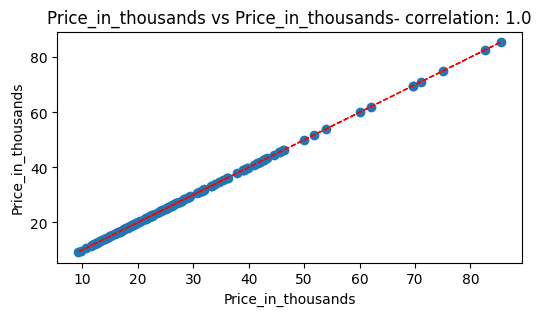

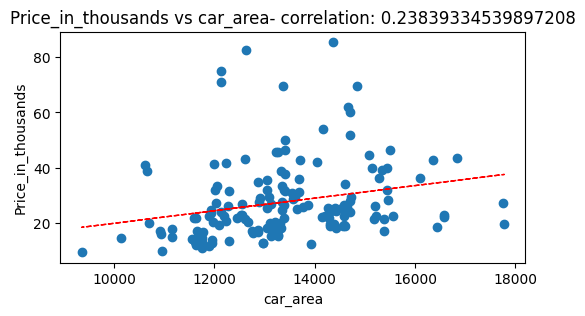

In [35]:
for col in numerical_columns:
    fig = plt.figure(figsize=(6, 3))
    ax = fig.gca()
    feature = df[col]
    label = df['Price_in_thousands']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price_in_thousands')
    ax.set_title('Price_in_thousands vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Price_in_thousands'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

**We saw that our independent variable [Price_in_thousands] has a positive correlation with the dependent variable but our Fuel_efficiency column has a negative correlation with the dependent variable.**

# **Que 3 =What is the distribution of cars among different manufacturers in the dataset, and which manufacturer has the highest number of cars?**

In [36]:
### Value counts of the column - Manufacturer

manufacturer_count = df['Manufacturer'].value_counts(dropna = False)
manufacturer_count

,count
Manufacturer,
Ford,11
Dodge,11
Chevrolet,9
Mercedes-B,9
Toyota,9
Nissan,7
Mitsubishi,7
Pontiac,6
Mercury,6


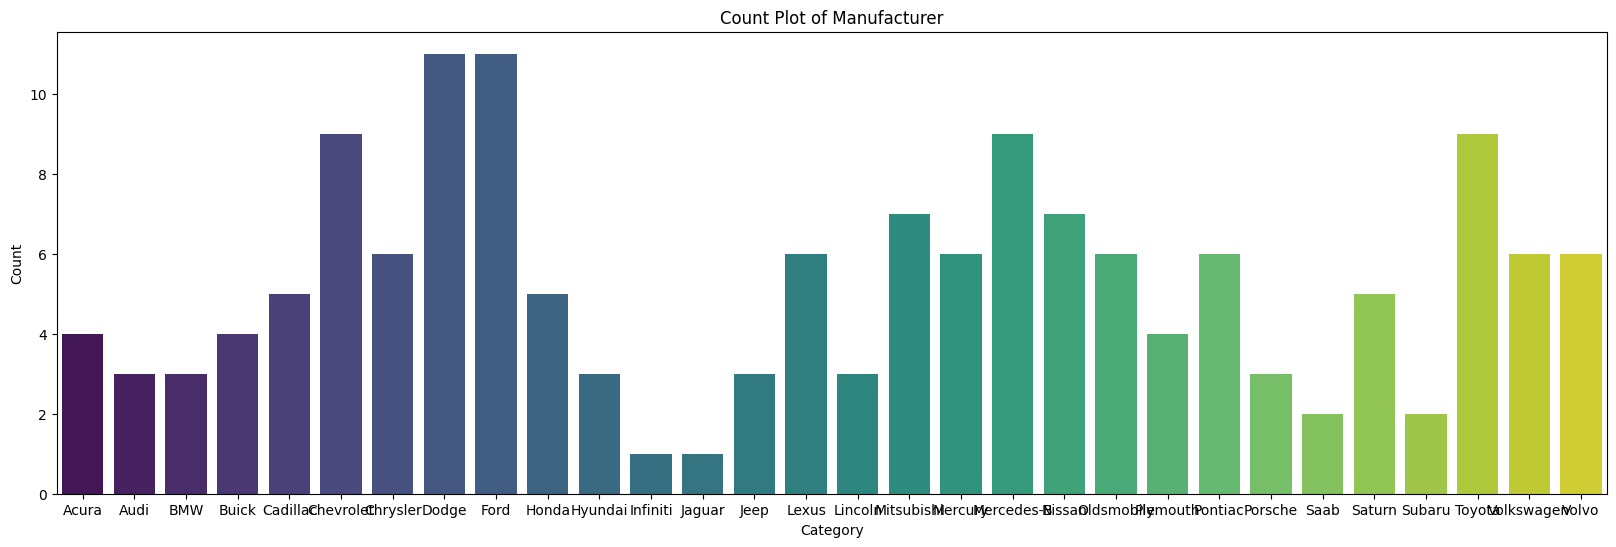

In [37]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Manufacturer', data=df, palette='viridis')
plt.title('Count Plot of Manufacturer')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**We saw that Dodge and Ford are two companies which have the most types of cars available in the market.**

<Axes: ylabel='count'>

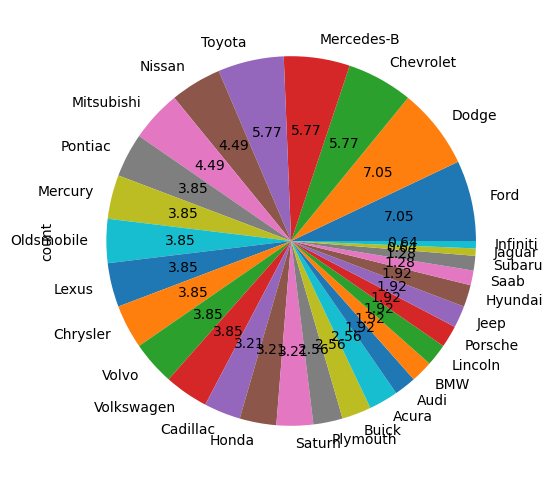

In [38]:
plt.figure(figsize=(20, 6))
df['Manufacturer'].value_counts().plot(kind='pie',autopct='%.2f')

# **Que 4 = What is the cumulative price (in thousands) of cars for each Manufacturer-Model combination in the dataset, and which Manufacturer-Model combination has the highest total price?**

In [39]:
grouped_data = df.groupby(['Manufacturer', 'Model'], as_index=False)['Price_in_thousands'].sum().sort_values(by='Price_in_thousands', ascending=False)
grouped_data

,Manufacturer,Model,Price_in_thousands
79,Mercedes-B,CL500,85.500
84,Mercedes-B,SL-Class,82.600
124,Porsche,Carrera Cabrio,74.970
125,Porsche,Carrera Coupe,71.020
44,Dodge,Viper,69.725
...,...,...,...
62,Hyundai,Elantra,11.799
143,Toyota,Tacoma,11.528
131,Saturn,SL,10.685
61,Hyundai,Accent,9.699


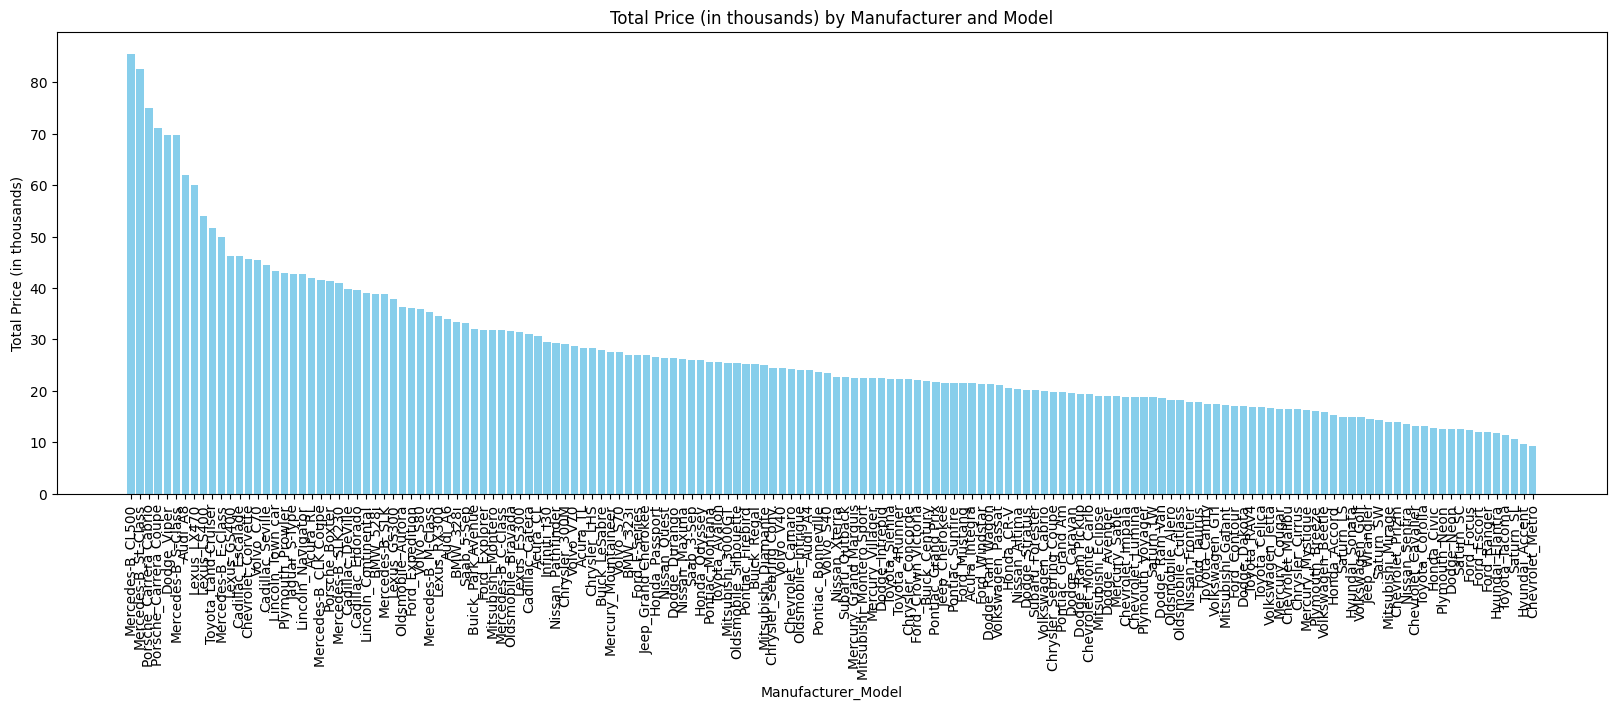

In [40]:
# Group by Manufacturer and Model, summing the Price_in_thousands
grouped_data = df.groupby(['Manufacturer', 'Model'], as_index=False)['Price_in_thousands'].sum().sort_values(by='Price_in_thousands', ascending=False)

# Plot
plt.figure(figsize=(20, 6))
plt.bar(grouped_data['Manufacturer'] + '_' + grouped_data['Model'], grouped_data['Price_in_thousands'], color='skyblue')
plt.title('Total Price (in thousands) by Manufacturer and Model')
plt.xlabel('Manufacturer_Model')
plt.ylabel('Total Price (in thousands)')
plt.xticks(rotation=90)
plt.show()

**The most expensive car is Mercedes-B which is named CL500 and its price is 85.500 thousand dollars.**

# **Que 5 = What is the average price (in thousands) of cars from each manufacturer in the dataset, and which manufacturer has the highest average price?**

In [41]:
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price_in_thousands'].mean().sort_values(ascending=False)
mean_price_per_manufacturer

,Price_in_thousands
Manufacturer,
Porsche,62.473333
Mercedes-B,52.916667
Lexus,44.055000
Jaguar,42.800000
Lincoln,41.690000
Cadillac,40.254000
Audi,39.980000
BMW,33.096667
Volvo,30.933333


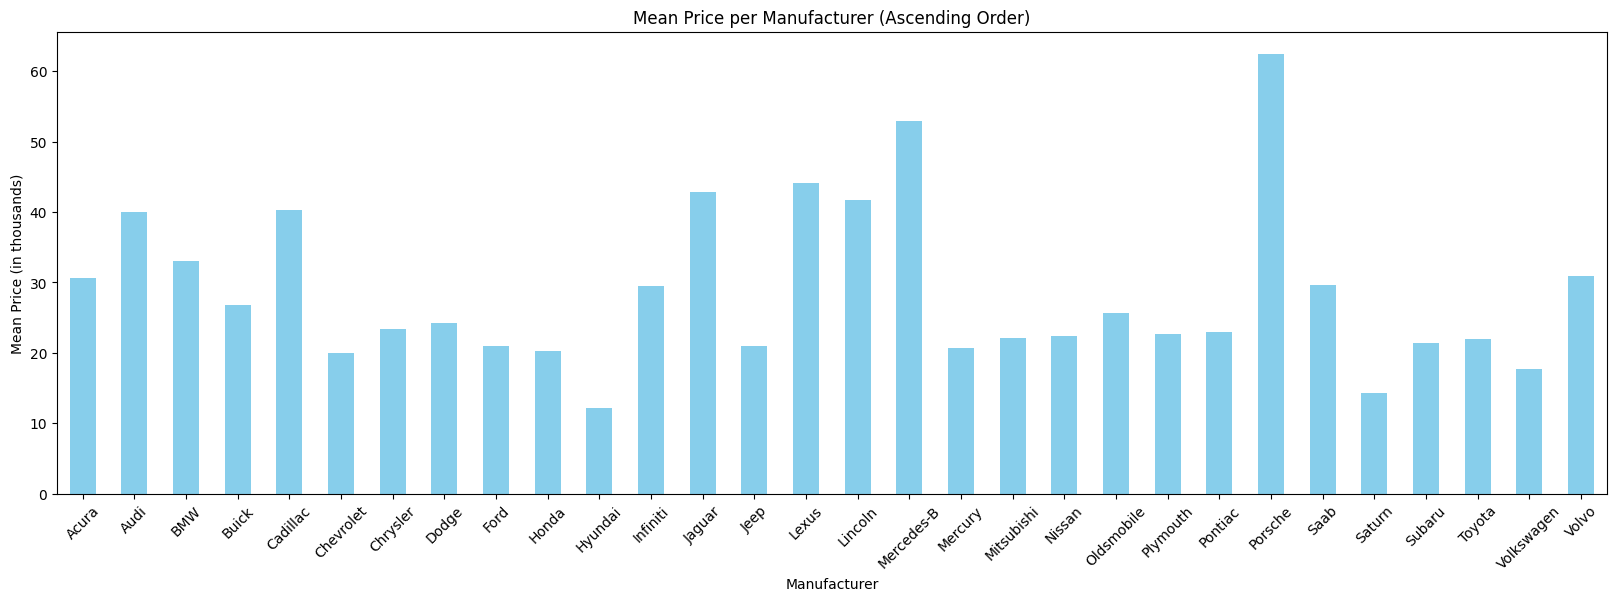

In [42]:
# Calculate mean price for each manufacturer
mean_price_per_manufacturer = df.groupby('Manufacturer')['Price_in_thousands'].mean()
# Plot
plt.figure(figsize=(20, 6))
mean_price_per_manufacturer.plot(kind='bar', color='skyblue')
plt.title('Mean Price per Manufacturer (Ascending Order)')
plt.xlabel('Manufacturer')
plt.ylabel('Mean Price (in thousands)')
plt.xticks(rotation=45)
plt.show()

**We found that the average price of a Porsche car is 62.47 thousand dollars which is the highest among the remaining manufactures.**

# **Que 6 = What is the distribution of vehicle types (e.g., Passenger, Car) in the dataset, and which type is the most common among the vehicles?**

In [43]:
df['Vehicle_type'].value_counts()

,count
Vehicle_type,
Passenger,116
Car,40


<Axes: xlabel='Vehicle_type'>

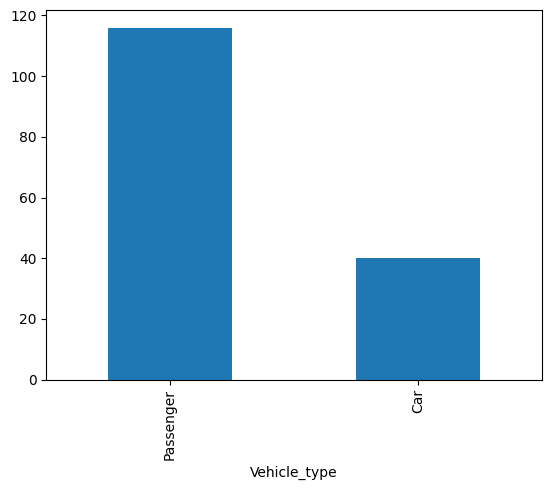

In [44]:
## Value counts of the column - Vehicle_type

vehicle_count = df['Vehicle_type'].value_counts().plot(kind='bar')
vehicle_count



*   Passenger: [116]
*   Car: [40]

**Among Passenger is the most common vehicle type is the most prevalent.**



# **Que 7 = What is the average price (in thousands) of vehicles for each vehicle type in the dataset? How do the average prices differ between different vehicle types**

In [45]:
### Mean price per each Vehicle type

mean_price_vehicle = df[['Vehicle_type', 'Price_in_thousands']].groupby('Vehicle_type', as_index = False).mean()
mean_price_vehicle

,Vehicle_type,Price_in_thousands
0,Car,26.319975
1,Passenger,27.787914


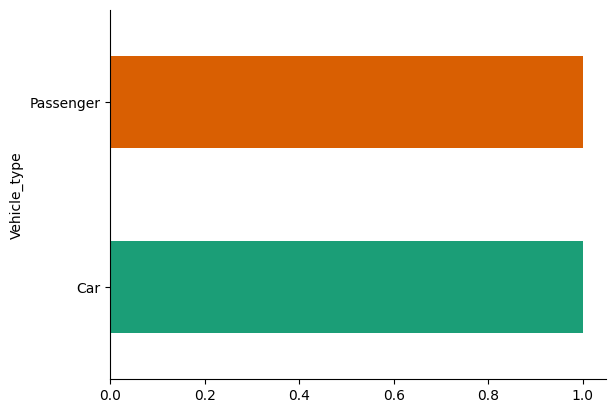

In [46]:
mean_price_vehicle.groupby('Vehicle_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**We have seen that the average price of car and passenger vehicle type has not huge difference, the average price of car is 26.31 thousand dollars. and average price of passenger 27.78 thousand dollars**

# **Que 8 = What is the sorted list of engine sizes for each car model, grouped by their respective manufacturers?**

In [47]:
engine_size = df[['Manufacturer', 'Model', 'Engine_size']].sort_values(by='Engine_size', ascending=False)
engine_size

,Manufacturer,Model,Engine_size
39,Dodge,Viper,8.0
24,Chevrolet,Corvette,5.7
18,Cadillac,Escalade,5.7
78,Lincoln,Navigator,5.4
40,Dodge,Ram Pickup,5.2
...,...,...,...
136,Toyota,Corolla,1.8
147,Volkswagen,Passat,1.8
57,Honda,Civic,1.6
62,Hyundai,Accent,1.5


**We saw that the Viper car manufactured by Dodge company has the largest engine size which is 8.0 liters.**

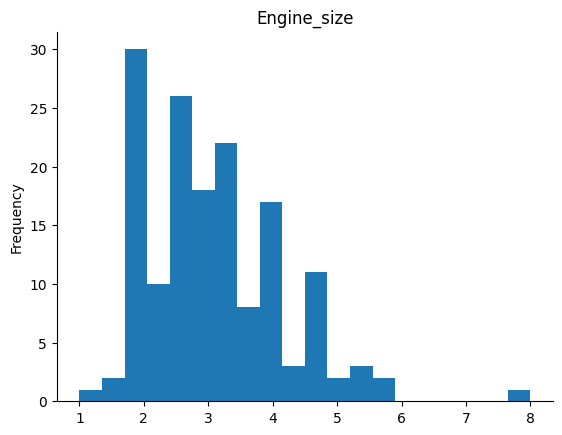

In [48]:
engine_size['Engine_size'].plot(kind='hist', bins=20, title='Engine_size')
plt.gca().spines[['top', 'right',]].set_visible(False)

# **Que 9 = What are the cars with the highest horsepower for each manufacturer and model in the dataset? How does the horsepower distribution vary across different manufacturers and models**

In [49]:
horsepower = df[['Manufacturer', 'Model', 'Horsepower']].sort_values(by='Horsepower', ascending=False)
horsepower

,Manufacturer,Model,Horsepower
39,Dodge,Viper,450.0
24,Chevrolet,Corvette,345.0
6,Audi,A8,310.0
95,Mercedes-B,SL-Class,302.0
99,Mercedes-B,CL500,302.0
...,...,...,...
57,Honda,Civic,106.0
129,Saturn,SL,100.0
130,Saturn,SC,100.0
62,Hyundai,Accent,92.0


**Again, Viper car which is manufactured by Dodge company, which comes with the largest engine size, also has the highest horse power.**

# **Que 10 = What is the relationship between engine size and fuel efficiency? Does the scatter plot reveal any discernible patterns or trends, such as a correlation between larger engine sizes and lower fuel efficiency, or vice versa**

Text(0, 0.5, 'Fuel Efficiency')

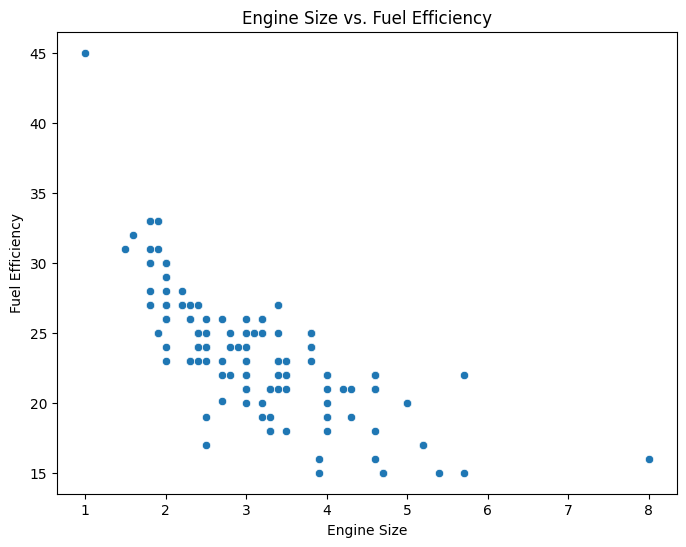

In [50]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine_size', y='Fuel_efficiency', data=df)
plt.title('Engine Size vs. Fuel Efficiency')
plt.xlabel('Engine Size')
plt.ylabel('Fuel Efficiency')

**We have a scatter plot to show that as the engine size is increased the fule efficiency is decreasing and as the engine size is reduced the fule efficiency is increasing.**

In [51]:
df.columns

Index(['Manufacturer', 'Model', 'Vehicle_type', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Price_in_thousands', 'car_area'],
      dtype='object')

In [52]:
df[['Manufacturer','Model','Curb_weight']].sort_values(by='Curb_weight',ascending=False)

,Manufacturer,Model,Curb_weight
18,Cadillac,Escalade,5.572
74,Lexus,LX470,5.401
78,Lincoln,Navigator,5.393
144,Toyota,Land Cruiser,5.115
54,Ford,Expedition,4.808
...,...,...,...
57,Honda,Civic,2.339
129,Saturn,SL,2.332
79,Mitsubishi,Mirage,2.250
62,Hyundai,Accent,2.240


# **Feature Selection**

# **Plotting the correlation matrix for the numerical columns**

<Axes: >

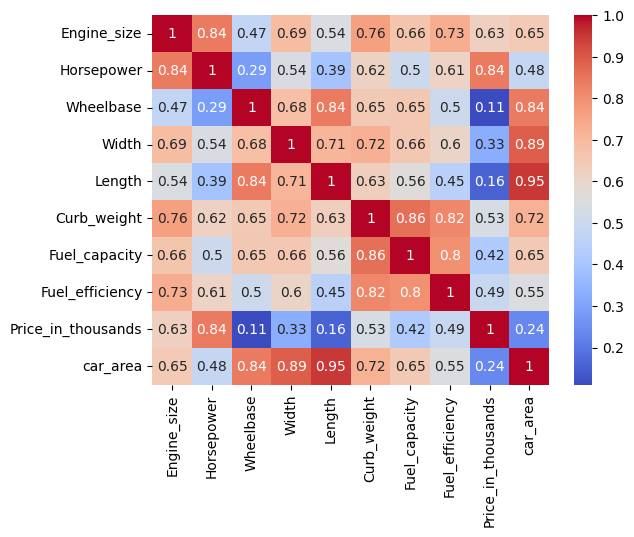

In [53]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns  # Include only numerical types

# Calculate the correlation matrix for numerical columns only
correlation = df[numerical_columns].corr()

# Plot the heatmap using the correlation matrix
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Correlation with Dependent Variable (Price in thousands)**

In [54]:
correlation.Price_in_thousands

,Price_in_thousands
Engine_size,0.626930
Horsepower,0.839318
Wheelbase,0.110381
Width,0.328822
Length,0.157355
Curb_weight,0.531474
Fuel_capacity,0.422878
Fuel_efficiency,-0.487164
Price_in_thousands,1.000000
car_area,0.238393


In [55]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(dataset):
  # Calculating VIF
  vif = pd.DataFrame()
  vif["features"] = dataset.columns
  vif["VIF_Value"] = [variance_inflation_factor(dataset.values, i) for i in range(dataset.shape[1])]
  return(vif)

In [56]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Price_in_thousands']]])

,features,VIF_Value
0,Engine_size,54.985336
1,Horsepower,43.088560
2,Wheelbase,899.904141
3,Width,751.237131
4,Length,1918.824776
5,Curb_weight,183.368874
6,Fuel_capacity,107.656976
7,Fuel_efficiency,120.218387
8,car_area,969.838098


In [57]:
df.describe().columns.values

array(['Engine_size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Price_in_thousands', 'car_area'], dtype=object)

In [58]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Engine_size', 'Horsepower', 'Wheelbase','Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Price_in_thousands']]])

,features,VIF_Value
0,Width,397.177140
1,Length,855.674218
2,car_area,424.050856


# **Feature Encoding**

# **Categorial columns Converted to Numerical Column using [One hot encoding]**

In [59]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_columns)

**Shape of the dataset**

In [60]:
df.shape

(156, 197)

In [61]:
df.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Price_in_thousands,car_area,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,21.50,11602.52,...,False,False,False,False,False,False,False,False,False,True
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,28.40,13560.87,...,False,False,False,False,False,False,False,False,False,True
2,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,30.63,13555.20,...,False,False,False,False,False,False,False,False,False,True
3,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,42.00,14037.24,...,False,False,False,False,False,False,False,False,False,True
4,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,23.99,12139.60,...,False,False,False,False,False,False,False,False,False,True


# **Modelling**


1.   Linear Regression
2.   Lasso Regression
3.   Cross validation Grid Search CV Lasso Regression
4.   Ridge Regression
5.   Cross validation Grid Search CV Ridge Regression

# **Data Transforming**

# **Split Dataset in X and Y (Independent and Dependent Variable)**

In [121]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
x = df.apply(zscore)

In [122]:
y = np.log10(df['Price_in_thousands'])

# **Show X and Y (Independent and Dependent Variable)**

In [64]:
x.head()

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Price_in_thousands,car_area,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
0,-1.210889,-0.812988,-0.825439,-1.118929,-1.116140,-1.181092,-1.226164,0.984224,-0.414503,-1.180273,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.58722,0.58722
1,0.133586,0.690949,0.080457,-0.247036,0.415009,0.211083,-0.194023,0.278730,0.069310,0.133236,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.58722,0.58722
2,0.133586,0.690949,-0.077090,-0.159847,0.347788,0.136559,-0.194023,0.513895,0.225673,0.129433,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.58722,0.58722
3,0.421687,0.425549,0.933837,0.072658,0.691363,0.739095,0.012406,-0.426763,1.022913,0.452748,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.58722,0.58722
4,-1.210889,-0.636055,-0.641634,-0.857361,-0.697875,-0.611854,-0.400451,0.749059,-0.239910,-0.820042,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.58722,0.58722


In [65]:
y.head()

,Price_in_thousands
0,1.332438
1,1.453318
2,1.486147
3,1.623249
4,1.380030


# **Splitting the data to Training and Test sets**

In [66]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state = 1)

In [67]:
x_train

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Price_in_thousands,car_area,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
105,0.229619,-0.282187,-0.155864,0.159847,-0.354300,0.892900,0.786511,-1.132257,0.132346,-0.180964,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,1.702939,-1.702939
136,-1.210889,-1.166856,-1.376853,-1.293307,-0.996636,-1.528343,-1.226164,2.160047,-1.002932,-1.178073,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
78,2.246331,2.017953,1.511509,2.543020,1.303823,3.185709,3.108828,-2.072915,1.069191,2.013037,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,1.702939,-1.702939
18,2.534432,1.221751,1.314575,1.700191,1.034938,3.469535,3.108828,-2.072915,1.319161,1.428757,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,1.702939,-1.702939
49,-0.058482,-0.547588,0.132972,0.537667,0.766053,-0.025174,-0.503665,0.043566,-0.667979,0.712693,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,-0.538651,-0.370654,-0.523474,-1.060803,-0.115291,0.049350,-0.271433,0.278730,-0.330712,-0.550478,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
138,-0.058482,0.425549,-0.050832,0.159847,0.340319,0.052521,0.141423,0.513895,-0.130876,0.266281,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
73,0.901856,1.841019,0.618742,0.247036,0.698832,0.802520,1.173564,-0.426763,1.864678,0.536696,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
141,-0.058482,0.142454,0.881321,0.653920,0.459824,0.594804,0.760708,-0.426763,-0.353641,0.563860,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,1.702939,-1.702939


In [68]:
x_test

,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Price_in_thousands,car_area,...,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra,Vehicle_type_Car,Vehicle_type_Passenger
118,-0.634685,-0.636055,-0.444700,-0.799235,-0.406583,-0.757731,-0.761700,0.749059,-0.406790,-0.617242,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
76,1.478060,1.575619,0.198617,0.712046,1.580177,0.767636,0.528476,-0.426763,0.818169,1.330295,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
52,0.901856,0.425549,0.539969,-0.276099,0.250691,0.780321,0.786511,-1.132257,0.316826,0.016711,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,1.702939,-1.702939
31,-1.018821,-0.954535,0.067328,-0.043595,-0.100353,-0.749803,-0.503665,0.749059,-0.766495,-0.104783,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
36,-0.538651,-0.406041,-0.497216,-0.595793,0.213346,-0.800543,-0.529468,0.043566,-0.586642,-0.147159,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
41,0.805823,-0.193720,0.277391,2.223326,0.392602,1.365416,3.624899,-2.072915,-0.427475,1.217131,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,1.702939,-1.702939
14,1.478060,1.575619,1.025739,0.973614,1.483080,0.942055,0.141423,-0.426763,0.875315,1.391196,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
110,-0.634685,-0.636055,-0.063961,-0.305162,-0.048070,-0.675279,-0.761700,0.749059,-0.640984,-0.184150,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220
54,1.478060,0.956350,1.511509,2.194263,1.288885,2.258120,2.076687,-1.837751,0.611672,1.837643,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,1.702939,-1.702939
147,-1.210889,-0.636055,-0.142735,-0.770172,-0.242264,-0.540501,-0.400451,0.749059,-0.435538,-0.503964,...,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.080322,-0.587220,0.587220


In [69]:
y_train

,Price_in_thousands
105,1.466853
136,1.117536
78,1.630021
18,1.664877
49,1.252489
...,...
134,1.355930
138,1.407306
73,1.732434
141,1.349627


In [70]:
y_test

,Price_in_thousands
118,1.334655
76,1.591955
52,1.504199
31,1.216957
36,1.279781
41,1.328685
14,1.600918
110,1.261739
54,1.557928
147,1.326336


# **Applying Linear Regression**

In [71]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# **It is bita not [our best fit line cut the y axis that the point is called Bita not]**

In [72]:
regressor.intercept_ # it show bita not ( cut in y_axis )

np.float64(1.3799147157422922)

# **it show all Bitas of independent variable**

In [73]:
regressor.coef_# it show all Bitas

array([ 1.58649430e-02,  3.08345342e-02,  2.39511957e-05,  6.56607204e-03,
       -1.45509560e-03,  1.64554245e-02,  9.79854157e-03, -1.58789700e-02,
        3.75623398e-02,  1.34508734e-03,  6.77280307e-03,  7.12448468e-03,
        9.06267900e-03,  9.35278780e-04,  3.85710186e-03, -6.28693518e-03,
       -4.25445099e-04, -7.07135627e-03, -9.45414582e-03, -2.65186498e-03,
       -1.18629760e-02,  2.46104825e-03,  6.21842657e-03, -7.06833022e-04,
        1.07777486e-02,  3.36184656e-03,  1.78600375e-02, -5.06889959e-03,
       -4.86742814e-04, -1.32984982e-03, -3.15711418e-04, -4.33291053e-03,
       -2.56275520e-03,  1.36665040e-19,  5.18657504e-03, -8.50010483e-03,
        4.43754631e-04, -5.99017107e-03, -3.39028788e-03,  1.01990243e-02,
       -8.95606561e-19,  2.32578061e-03, -3.49769177e-18,  1.47866804e-03,
        5.50074478e-03, -2.82448227e-20,  7.31122543e-03,  8.61600775e-03,
        1.63053871e-03, -1.43770765e-18,  1.06295595e-02, -8.78167221e-03,
       -6.95550844e-03, -

# **Predict the model to pass x-test data and second pass x-train data**

In [74]:
y_test_pred = regressor.predict(x_test)
x_train_pred = regressor.predict(x_train)

# **It is the predicted value in x_test Data**

In [75]:
y_test_pred

array([1.29156441, 1.54317723, 1.39840426, 1.28112897, 1.29296789,
       1.42932558, 1.54378108, 1.29912307, 1.50033245, 1.28426562,
       1.370953  , 1.21671339, 1.55840305, 1.35306954, 1.40122661,
       1.48281921, 1.42259439, 1.54325709, 1.22503281, 1.34761732,
       1.18698904, 1.55458021, 1.29171595, 1.52048875, 1.68933495,
       1.46882389, 1.74423977, 1.29227888, 1.38431589, 1.30179386,
       1.3715931 , 1.22370424, 1.28748726, 1.44462404, 1.21243778,
       1.39204431, 1.39566093, 1.23964576, 1.25086455, 1.56948735,
       1.27257065, 1.3239829 , 1.56543026, 1.41808089, 1.23336008,
       1.44013019, 1.66584128])

# **It is the Actual Value of X_test Data**

In [76]:
y_test

,Price_in_thousands
118,1.334655
76,1.591955
52,1.504199
31,1.216957
36,1.279781
41,1.328685
14,1.600918
110,1.261739
54,1.557928
147,1.326336


# **It show the difference between Actual value and Predicted Vaule of test dataset in linear regression**

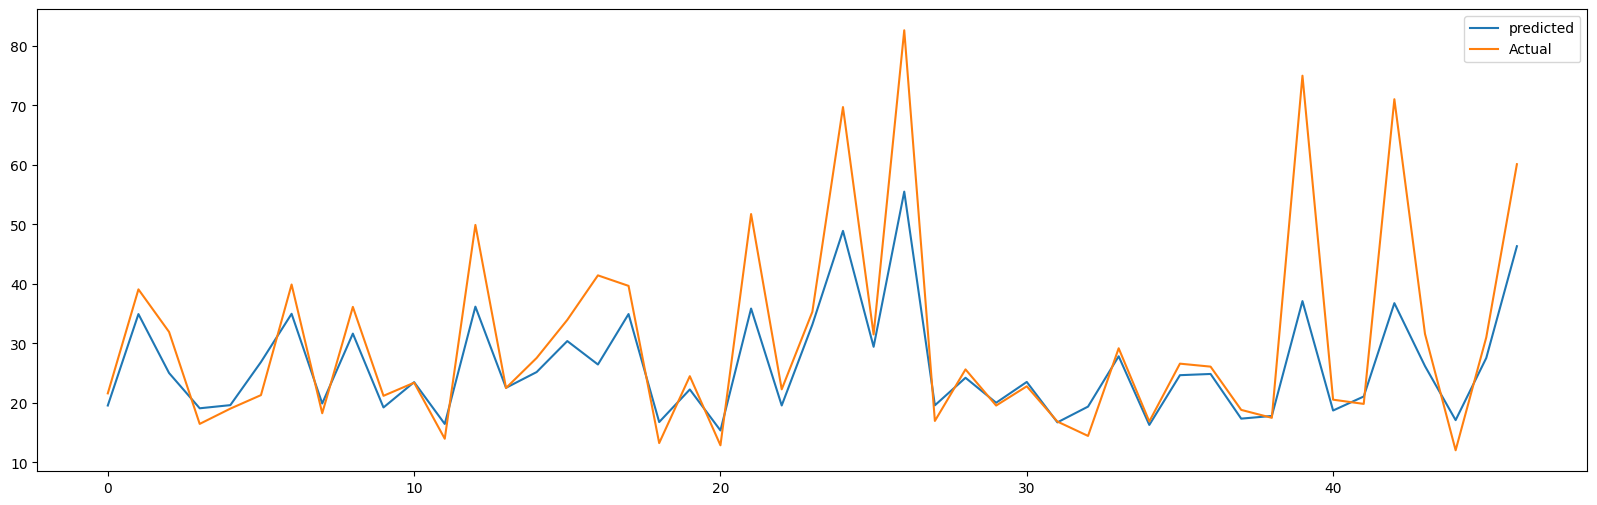

In [77]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(y_test_pred))
plt.plot(10**(np.array(y_test)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of test dataset Linear regression**

In [78]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Create the dictionaries if they are not already defined
model_mean_squared_error_test = {}
model_rmse_test = {}
model_r2_test = {}
model_mean_squared_error_train={}
model_rmse_train={}
model_r2_train={}

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate the mean squared error
mean_squared_error = mean_squared_error(10**y_test, 10**y_test_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error)

# Calculate the R^2 score
r2_score = r2_score(10**y_test, 10**y_test_pred)

model_mean_squared_error_test['Linear Regression'] = mean_squared_error
model_rmse_test['Linear Regression'] = rmse
model_r2_test['Linear Regression'] = r2_score

# Print the results
print('mean_squared_error:', mean_squared_error)
print('rmse:', rmse)
print('r2_score:', r2_score)

mean_squared_error: 106.1362587345823
rmse: 10.302245324907688
r2_score: 0.6372670346073082


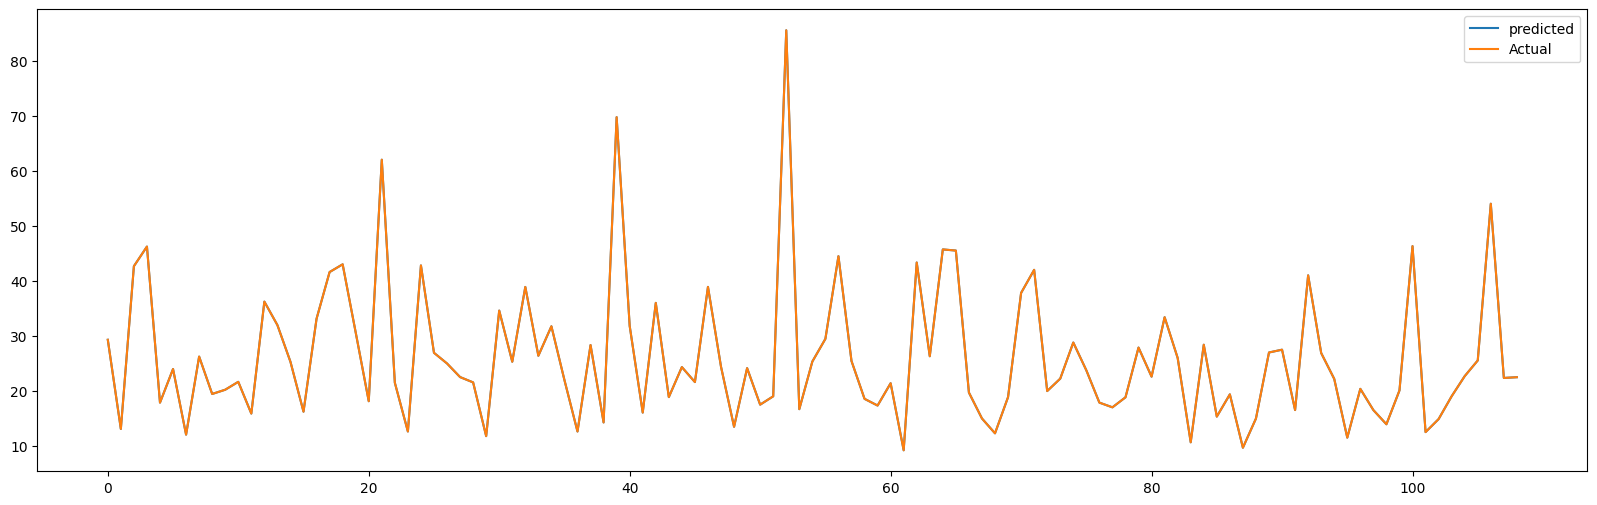

In [80]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(x_train_pred))
plt.plot(10**(np.array(y_train)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of Training dataset Linear regression**

In [81]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean squared error
x_train_mean_squared_error = mean_squared_error(10**y_train, 10**x_train_pred)

# Calculate the root mean squared error
rmse = np.sqrt(x_train_mean_squared_error)

# Calculate the R^2 score
x_train_r2_score = r2_score(10**y_train, 10**x_train_pred)

model_mean_squared_error_train['Linear Regression'] = x_train_mean_squared_error
model_rmse_train['Linear Regression'] = rmse
model_r2_train['Linear Regression'] = x_train_r2_score
# Print the results
print('mean_squared_error:', x_train_mean_squared_error)
print('rmse:', rmse)
print('r2_score:', x_train_r2_score)

mean_squared_error: 1.9227652280320876e-27
rmse: 4.3849346951033234e-14
r2_score: 1.0


**The Linear Regression Model is mean_squared_error: 152.1194737122131 rmse: 12.333672353042832 r2_score: 0.48011406797752676 for Test Dataset and mean_squared_error: 2.8878098935897992e-27 rmse: 5.373834658407159e-14 r2_score: 1.0 for Testing Data**

# <b> Applying Lasso Regression

In [82]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 300)

lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=300)

# **It show all Bitas of independent variable**

In [83]:
lasso.coef_

array([ 0.        ,  0.01947654,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.0563022 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.  

In [84]:
lasso.score(x_train, y_train)

0.5560158592269624

# **Predict the model to pass x-test data and second pass x-train data**

In [85]:
y_test_pred_l = lasso.predict(x_test)
y_train_pred_l = lasso.predict(x_train)

# **It show the difference between Actual value and Predicted Vaule of test dataset in lasso regression**

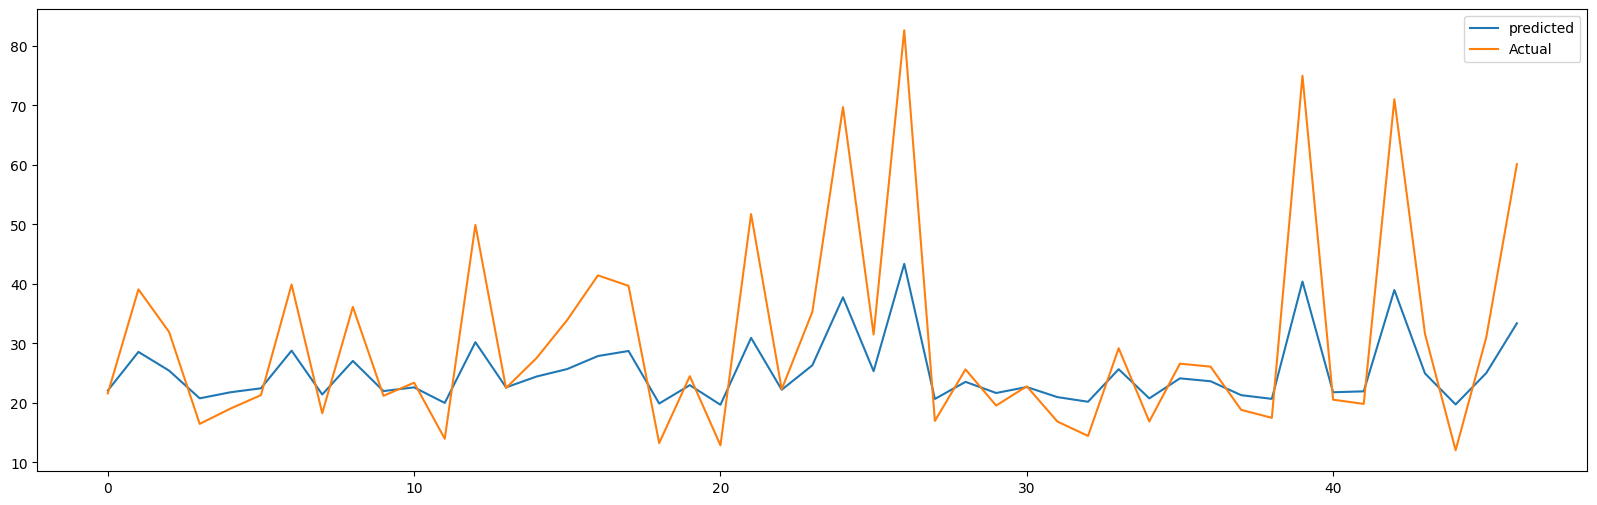

In [86]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(y_test_pred_l))
plt.plot(10**(np.array(y_test)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of Test dataset Lasso regression**

In [87]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean squared error
y_test_mean_squared_error = mean_squared_error(10**y_test, 10**y_test_pred_l)

# Calculate the root mean squared error
rmse = np.sqrt(y_test_mean_squared_error)

# Calculate the R^2 score
y_test_r2_score = r2_score(10**y_test, 10**y_test_pred_l)

model_mean_squared_error_test['Lasso Regression'] = y_test_mean_squared_error
model_rmse_test['Lasso Regression'] = rmse
model_r2_test['Lasso Regression'] = y_test_r2_score

# Print the results
print('mean_squared_error:', y_test_mean_squared_error)
print('rmse:', rmse)
print('r2_score:', y_test_r2_score)

mean_squared_error: 162.05990225436977
rmse: 12.730275026658685
r2_score: 0.44614150134139197


# **It show the difference between Actual value and Predicted Vaule of test dataset in lasso regression**

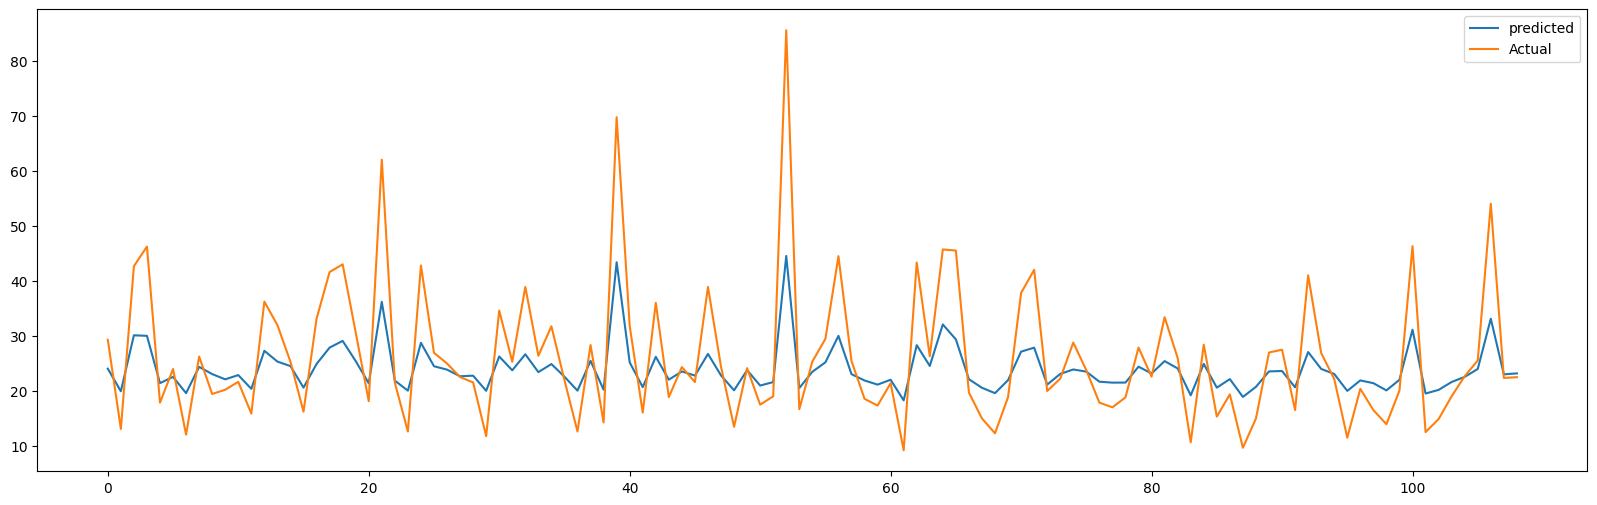

In [88]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(y_train_pred_l))
plt.plot(10**(np.array(y_train)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of Training dataset Lasso regression**

In [89]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean squared error
y_train_mean_squared_error = mean_squared_error(10**y_train, 10**y_train_pred_l)

# Calculate the root mean squared error
rmse = np.sqrt(y_train_mean_squared_error)

# Calculate the R^2 score
y_train_r2_score = r2_score(10**y_train, 10**y_train_pred_l)

model_mean_squared_error_train['Lasso Regression'] = y_train_mean_squared_error
model_rmse_train['Lasso Regression'] = rmse
model_r2_train['Lasso Regression'] = y_train_r2_score
# Print the results
print('mean_squared_error:', y_train_mean_squared_error)
print('rmse:', rmse)
print('r2_score:', y_train_r2_score)

mean_squared_error: 76.52781127797768
rmse: 8.748017562738296
r2_score: 0.5187825873664559


**The Lasso Regression Model is mean_squared_error: 162.05990225436977
rmse: 12.730275026658685 r2_score: 0.44614150134139197 for Test Dataset and mean_squared_error: 76.52781127797768 rmse: 8.748017562738296 r2_score: 0.5187825873664559 for Testing Data**

# **Cross validation Grid Search CV Lasso Regression**

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [92]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0032494027126691916


# **Predict the model to pass x-test data and second pass x-train data**

In [93]:
y_test_pred_lasso = lasso_regressor.predict(x_test)
y_train_pred_lasso = lasso_regressor.predict(x_train)

# **It show the difference between Actual value and Predicted Vaule of test dataset in GridSearchCV lasso regression**

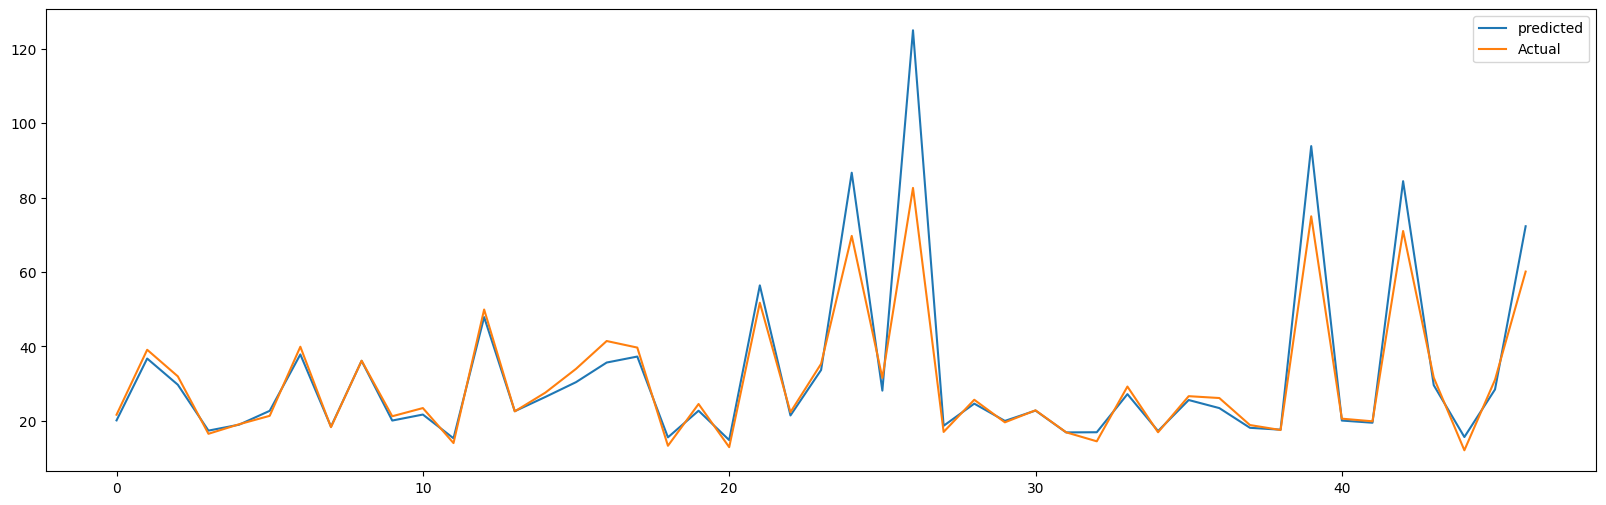

In [94]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(y_test_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of Test dataset GridSearchCV Lasso regression**

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean squared error
y_test_mean_squared_error = mean_squared_error(y_test, y_test_pred_lasso)

# Calculate the root mean squared error
rmse = np.sqrt(y_test_mean_squared_error)

# Calculate the R^2 score
y_test_r2_score = r2_score(y_test, y_test_pred_lasso)

model_mean_squared_error_test['GridSearchCV Lasso Regression'] = y_test_mean_squared_error
model_rmse_test['GridSearchCV Lasso Regression'] = rmse
model_r2_test['GridSearchCV Lasso Regression'] = y_test_r2_score

# Print the results
print('mean_squared_error:', y_test_mean_squared_error)
print('rmse:', rmse)
print('r2_score:', y_test_r2_score)

mean_squared_error: 0.0025174784011196645
rmse: 0.05017447957995842
r2_score: 0.9434169600044618


# **It show the difference between Actual value and Predicted Vaule of test dataset in GridSearchCV lasso regression**

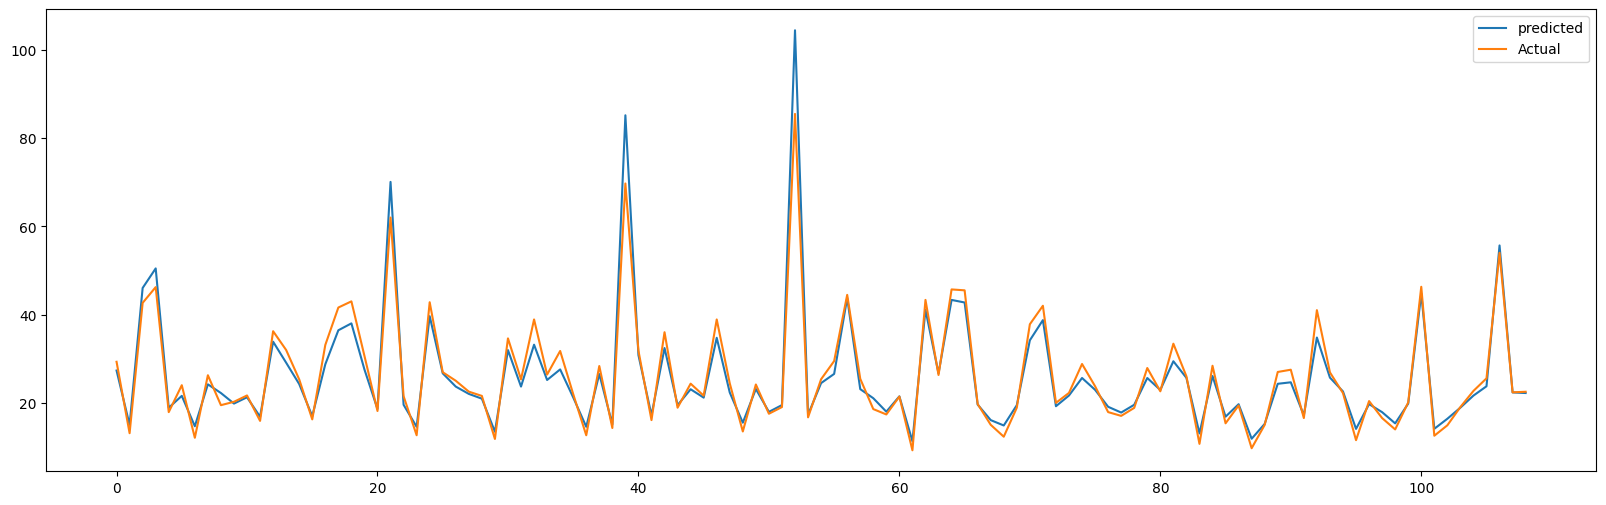

In [96]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(y_train_pred_lasso))
plt.plot(10**(np.array(y_train)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of Training dataset GridSearchCV Lasso regression**

In [97]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean squared error
y_train_mean_squared_error = mean_squared_error(10**y_train, 10**y_train_pred_lasso)

# Calculate the root mean squared error
rmse = np.sqrt(y_train_mean_squared_error)

# Calculate the R^2 score
y_train_r2_score = r2_score(10**y_train, 10**y_train_pred_lasso)

model_mean_squared_error_train['GridSearchCV Lasso Regression'] = y_train_mean_squared_error
model_rmse_train['GridSearchCV Lasso Regression'] = rmse
model_r2_train['GridSearchCV Lasso Regression'] = y_train_r2_score
# Print the results
print('mean_squared_error:', y_train_mean_squared_error)
print('rmse:', rmse)
print('r2_score:', y_train_r2_score)

mean_squared_error: 10.741089020091215
rmse: 3.277360068727758
r2_score: 0.9324585535532978


**The GridSearchCV Lasso Regression Model is mean_squared_error: 0.0025174784011196645 rmse: 0.05017447957995842 r2_score: 0.9434169600044618 for Test Dataset and mean_squared_error: 10.741089020091215 rmse: 3.277360068727758
r2_score: 0.9324585535532978 for Testing Data**

# <b> Applying Ridge Regression

In [98]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [99]:
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [100]:
ridge.score(x_train, y_train)

0.9999999356071536

# **Predict the model to pass x-test data and second pass x-train data**

In [101]:
y_test_pred_ridge = ridge.predict(x_test)
y_train_pred_ridge = ridge.predict(x_train)

# **It show the difference between Actual value and Predicted Vaule of test dataset in Ridge regression**

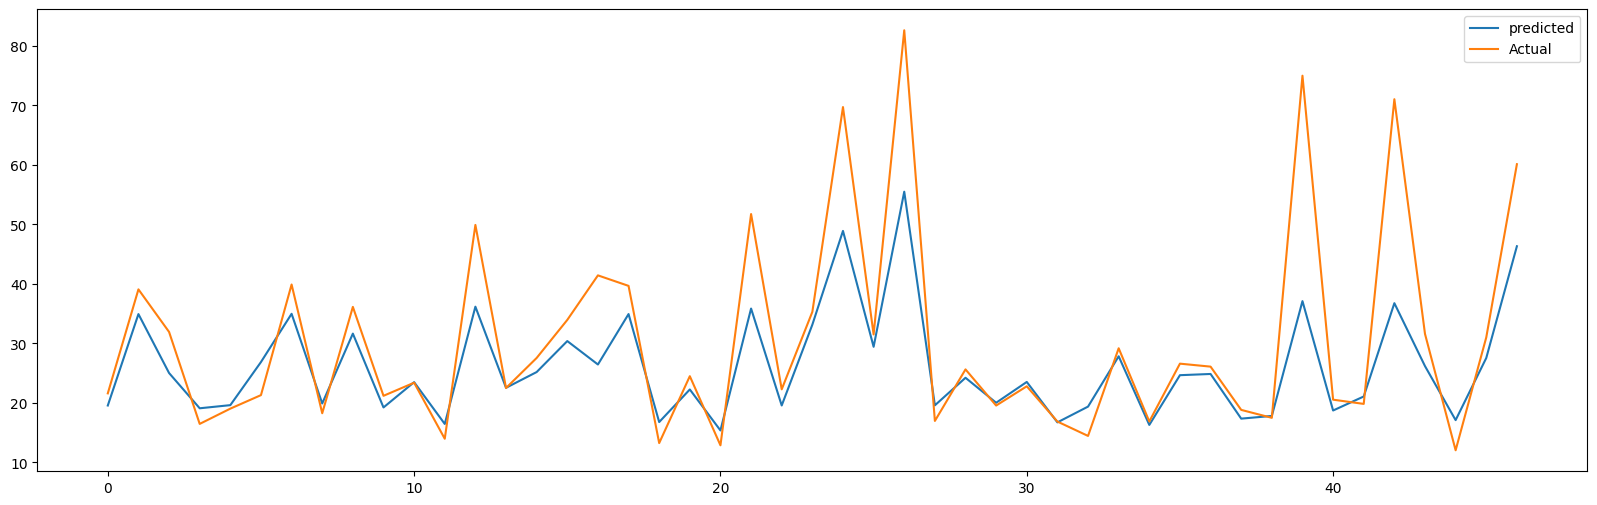

In [102]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(y_test_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of Test dataset Ridge regression**

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean squared error
y_train_mean_squared_error = mean_squared_error(10**y_test, 10**y_test_pred_ridge)

# Calculate the root mean squared error
rmse = np.sqrt(y_train_mean_squared_error)

# Calculate the R^2 score
y_train_r2_score = r2_score(10**y_test, 10**y_test_pred_ridge)

model_mean_squared_error_test['Ridge Regression'] = y_train_mean_squared_error
model_rmse_test['Ridge Regression'] = rmse
model_r2_test['Ridge Regression'] = y_train_r2_score

# Print the results
print('mean_squared_error:', y_train_mean_squared_error)
print('rmse:', rmse)
print('r2_score:', y_train_r2_score)

mean_squared_error: 106.17809127377126
rmse: 10.30427538809844
r2_score: 0.6371240670562486


# **It show the difference between Actual value and Predicted Vaule of test dataset in Ridge regression**

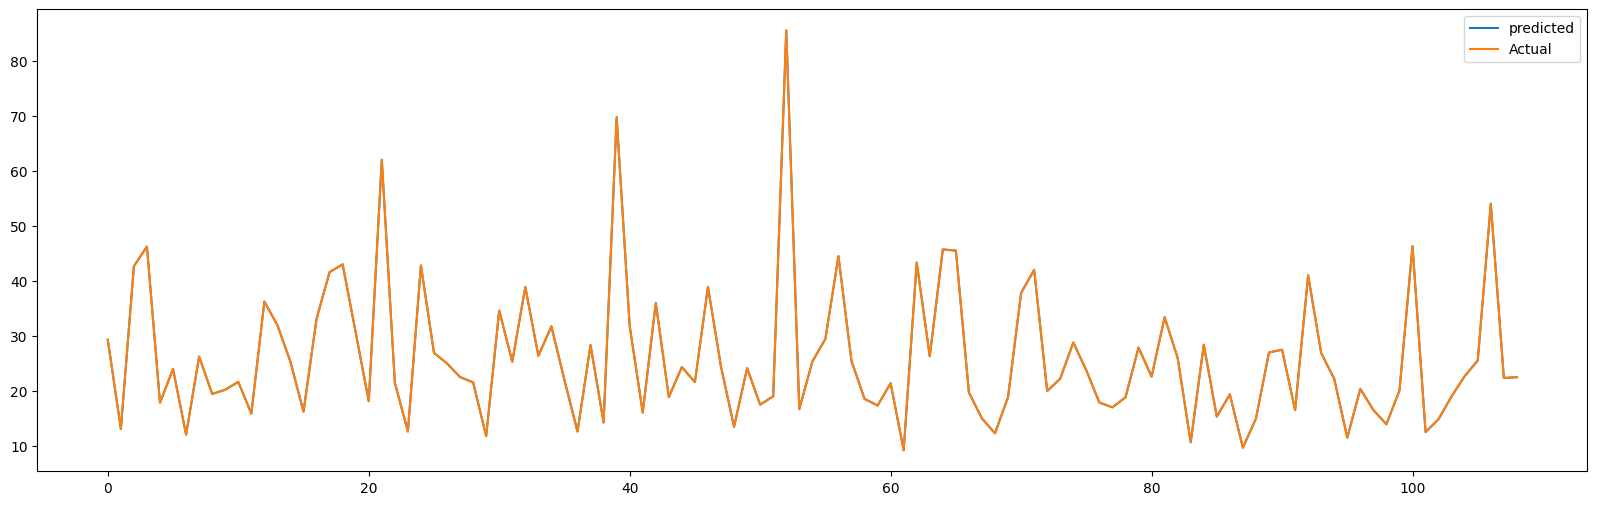

In [104]:
# Create a plot of prediction output
# It show the difference between Actual value and Predicted Vaule
plt.figure(figsize=(20,6))
plt.plot(10**(y_train_pred_ridge))
plt.plot(10**(np.array(y_train)))
plt.legend(["predicted", "Actual"])
plt.show()

# **It is the Accurecy of Training dataset Ridge regression**

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Calculate the mean squared error
y_train_mean_squared_error = mean_squared_error(10**y_train, 10**y_train_pred_ridge)

# Calculate the root mean squared error
rmse = np.sqrt(y_train_mean_squared_error)

# Calculate the R^2 score
y_train_r2_score = r2_score(10**y_train, 10**y_train_pred_ridge)

model_mean_squared_error_train['Ridge Regression'] = y_train_mean_squared_error
model_rmse_train['Ridge Regression'] = rmse
model_r2_train['Ridge Regression'] = y_train_r2_score
# Print the results
print('mean_squared_error:', y_train_mean_squared_error)
print('rmse:', rmse)
print('r2_score:', y_train_r2_score)

mean_squared_error: 1.6864864096496805e-05
rmse: 0.0041066852930918395
r2_score: 0.9999998939514129


**The Ridge Regression Model is mean_squared_error: 106.1780912737713
rmse: 10.304275388098443 r2_score: 0.6371240670562484 for Test Dataset and mean_squared_error: 1.686486409650786e-05 rmse: 0.004106685293093186
r2_score: 0.9999998939514129 for Testing Data**

# **Cross validation Grid Search CV Ridge Regression**

In [106]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [107]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.009883157736629141


# **Predict the model to pass x-test data and second pass x-train data**

In [108]:
#Model Prediction
y_test_pred_ridge = ridge_regressor.predict(x_test)
y_train_pred_ridge = ridge_regressor.predict(x_train)

# **It show the difference between Actual value and Predicted Vaule of test dataset in cross validation grid search Ridge regression**

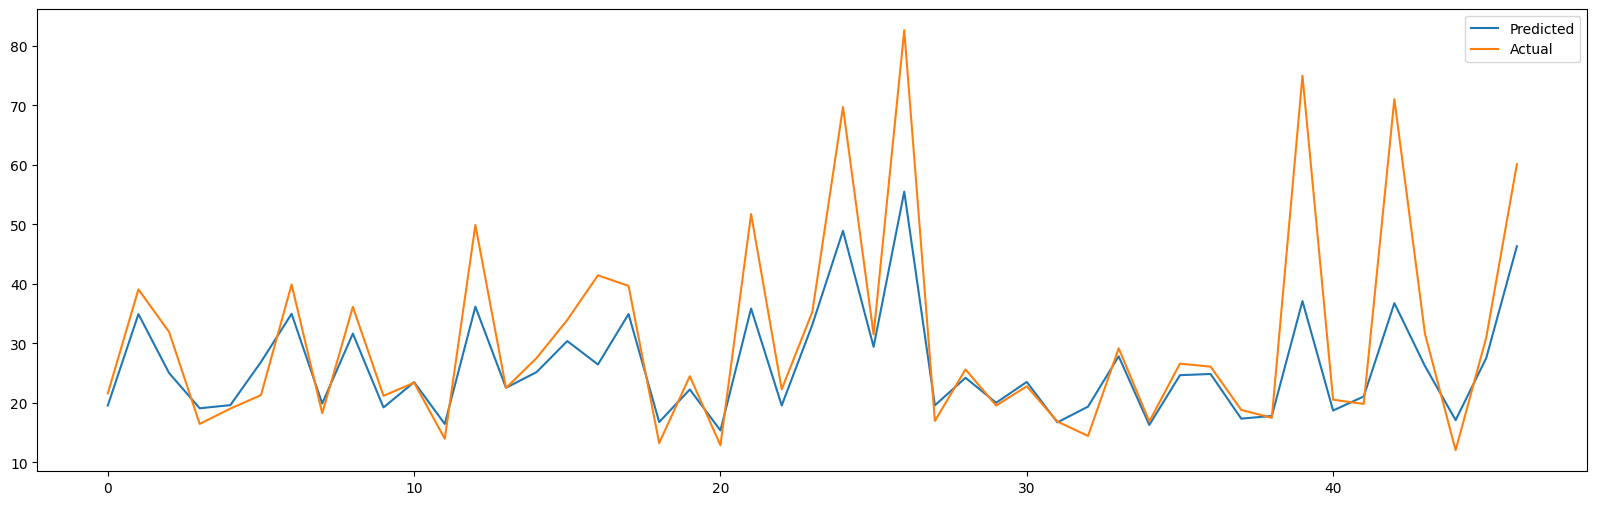

In [109]:
plt.figure(figsize=(20,6))
plt.plot(10**(y_test_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# **It is the Accurecy of Test dataset Grid Search Cross ValidationRidge regression**

In [110]:
MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_ridge))
print("R2 :" ,r2)
model_mean_squared_error_test['GridSearchCV Ridge Regression'] = MSE
model_rmse_test['GridSearchCV Ridge Regression'] = RMSE
model_r2_test['GridSearchCV Ridge Regression'] = r2
# print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_test_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 106.13625873458206
RMSE : 10.302245324907675
R2 : 0.637267034607309


# **It show the difference between Actual value and Predicted Vaule of test dataset in Ridge regression**

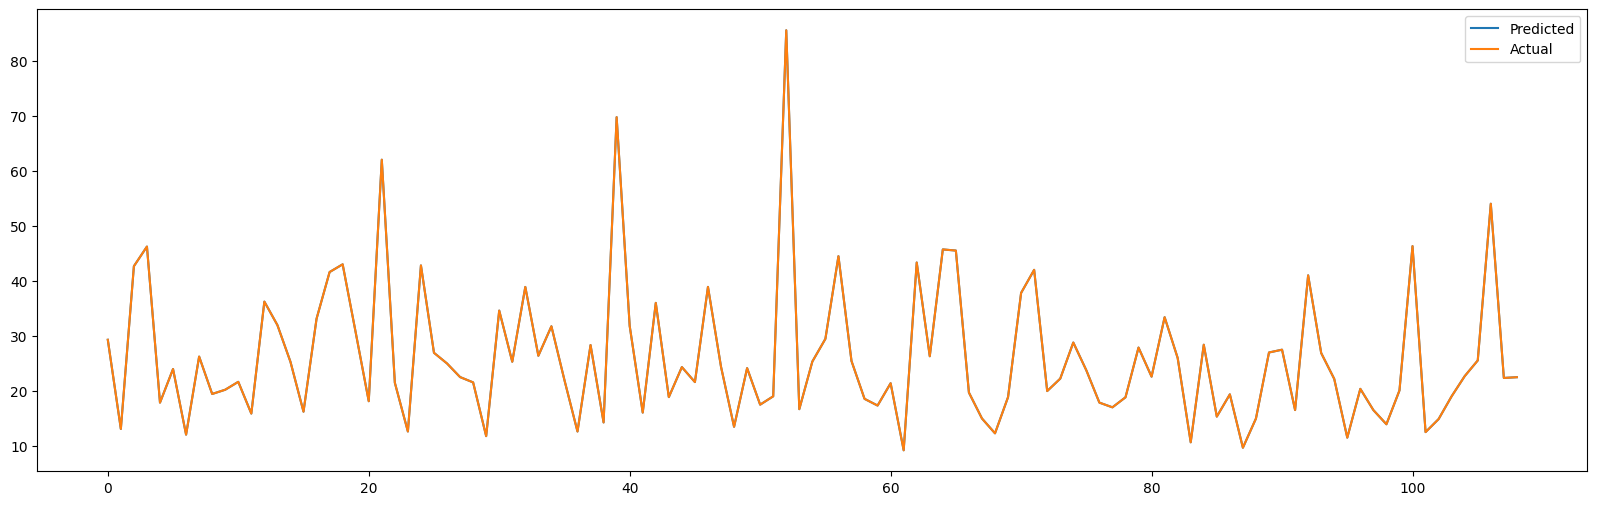

In [111]:
plt.figure(figsize=(20,6))
plt.plot(10**(y_train_pred_ridge))
plt.plot(10**(np.array(y_train)))
plt.legend(["Predicted","Actual"])
plt.show()

# **It is the Accurecy of Train dataset Grid Search Cross ValidationRidge regression**

In [112]:
MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_train), 10**(y_train_pred_ridge))
print("R2 :" ,r2)
model_mean_squared_error_train['GridSearchCV Ridge Regression'] = MSE
model_rmse_train['GridSearchCV Ridge Regression'] = RMSE
model_r2_train['GridSearchCV Ridge Regression'] = r2

MSE : 1.2255279839128923e-27
RMSE : 3.500754181477032e-14
R2 : 1.0


**The GridSearchCV Ridge Regression Model is MSE : 106.13625873458209 RMSE : 10.302245324907677 R2 : 0.6372670346073089 for Test Dataset and MSE : 1.2514952584810848e-27 RMSE : 3.5376478887547366e-14 R2 : 1.0 for Testing Data**

# **Model evalution**

In [113]:
model_mean_squared_error_train

{'Linear Regression': 1.9227652280320876e-27,
 'Lasso Regression': 76.52781127797768,
 'GridSearchCV Lasso Regression': 10.741089020091215,
 'Ridge Regression': 1.6864864096496805e-05,
 'GridSearchCV Ridge Regression': 1.2255279839128923e-27}

In [114]:
model_rmse_train

{'Linear Regression': np.float64(4.3849346951033234e-14),
 'Lasso Regression': np.float64(8.748017562738296),
 'GridSearchCV Lasso Regression': np.float64(3.277360068727758),
 'Ridge Regression': np.float64(0.0041066852930918395),
 'GridSearchCV Ridge Regression': np.float64(3.500754181477032e-14)}

In [115]:
model_r2_train

{'Linear Regression': 1.0,
 'Lasso Regression': 0.5187825873664559,
 'GridSearchCV Lasso Regression': 0.9324585535532978,
 'Ridge Regression': 0.9999998939514129,
 'GridSearchCV Ridge Regression': 1.0}

In [116]:
model_mean_squared_error_test


{'Linear Regression': 106.1362587345823,
 'Lasso Regression': 162.05990225436977,
 'GridSearchCV Lasso Regression': 0.0025174784011196645,
 'Ridge Regression': 106.17809127377126,
 'GridSearchCV Ridge Regression': 106.13625873458206}

In [117]:
model_rmse_test


{'Linear Regression': np.float64(10.302245324907688),
 'Lasso Regression': np.float64(12.730275026658685),
 'GridSearchCV Lasso Regression': np.float64(0.05017447957995842),
 'Ridge Regression': np.float64(10.30427538809844),
 'GridSearchCV Ridge Regression': np.float64(10.302245324907675)}

In [118]:
model_r2_test

{'Linear Regression': 0.6372670346073082,
 'Lasso Regression': 0.44614150134139197,
 'GridSearchCV Lasso Regression': 0.9434169600044618,
 'Ridge Regression': 0.6371240670562486,
 'GridSearchCV Ridge Regression': 0.637267034607309}

In [119]:
### Tabulating the results
from tabulate import tabulate
table = []
table.append(['S.No.', 'Classification Model','Mean Suared Error Test','Mean squared Error Train', 'Root Mean Squared Error Test','Root Mean Squared Error Train', 'R-squared Test','R-squared Train'])
count = 1

for model in model_mean_squared_error_train:
    row = [count, model,model_mean_squared_error_test[model],model_mean_squared_error_train[model], model_rmse_test[model],model_rmse_train[model], model_r2_test[model],model_r2_train[model]]
    table.append(row)
    count += 1

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═══════════════════════════════╤══════════════════════════╤════════════════════════════╤════════════════════════════════╤═════════════════════════════════╤══════════════════╤═══════════════════╕
│   S.No. │ Classification Model          │   Mean Suared Error Test │   Mean squared Error Train │   Root Mean Squared Error Test │   Root Mean Squared Error Train │   R-squared Test │   R-squared Train │
╞═════════╪═══════════════════════════════╪══════════════════════════╪════════════════════════════╪════════════════════════════════╪═════════════════════════════════╪══════════════════╪═══════════════════╡
│       1 │ Linear Regression             │             106.136      │                1.92277e-27 │                     10.3022    │                     4.38493e-14 │         0.637267 │          1        │
├─────────┼───────────────────────────────┼──────────────────────────┼────────────────────────────┼────────────────────────────────┼─────────────────────────────────┼──────────

**From the above table, we can see that the model GridSearchCV Lasso regression has the least Root Mean Squared Error for test 0.0501745 and train 3.27736 and the highest R-squared value for test 0.943417 and train 0.932459.**

# **Conclusion**


---

That's it! We reached the end of our exercise.
## We learned that :

 * We noticed that every column in our dataset is positively and negatively skewed because our dataset contains cars from different price ranges


* We saw that our independent variable [Price_in_thousands] has a positive correlation with the dependent variable but our Fuel_efficiency column has a negative correlation with the dependent variable.

  
* We saw that Dodge and Ford are two companies which have the most types of cars available in the market.

* The most expensive car is Mercedes-B which is named CL500 and its price is 85.500 thousand dollars.

* We found that the average price of a Porsche car is 62.47 thousand dollars which is the highest among the remaining manufactures.

* Passenger: [116]
Car: [40]
Among Passenger is the most common vehicle type is the most prevalent.


* We have seen that the average price of car and passenger vehicle type has not huge difference, the average price of car is 26.31 thousand dollars. and average price of passenger 27.78 thousand dollars


* We saw that the Viper car manufactured by Dodge company has the largest engine size which is 8.0 liters.


* Again, Viper car which is manufactured by Dodge company, which comes with the largest engine size, also has the highest horse power.


* We have a scatter plot to show that as the engine size is increased the fule efficiency is decreasing and as the engine size is reduced the fule efficiency is increasing.

* The model GridSearchCV Lasso regression has the least Root Mean Squared Error for test 0.0501745 and train 3.27736 and the highest R-squared value for test 0.943417 and train 0.932459